# **Exploratory Data Analysis (EDA) for a Belgium startup at food and beverage industry**

**1.Understanding Sales Trends** :

Sales by Product

Temporal Analysis

Promotional Impact


**2.Customer Behavior Analysis** :

Customer Segmentation

Purchase Frequency

Basket Analysis

**3.Product Performance** :

Inventory Turnover

Profitability Analysis

**4.Operational Efficiency** :

Point of Sale (POS) Performance


# **Import Library**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# set style of visualization
sns.set_style("darkgrid")
sns.set_palette("RdBu")

In [ ]:
data = pd.read_excel('/content/sale.order (10).xlsx')

# **Data information**

In [ ]:
# see number of columns and row range
data.shape

(138302, 17)

In [ ]:
# see top 5 rows
data.head()

,Order Reference,Order Date,Order Lines/Warehouse,Order Lines/Order Reference,Order Lines/Order Reference/Order Date,Order Lines/Customer/Full Name,Order Lines/Quantity,Order Lines/Product,Order Lines/Product/Product Category,Order Lines/Unit Price,Order Lines/Discount (%),Order Lines/Price Reduce,Order Lines/Taxes,Order Lines/Price Reduce Tax inc,Order Lines/Subtotal,Order Lines/Product/Cost,Order Lines/Created on
0,S02325,2023-03-22 09:15:33,Pleinlaan 11 - Fridge 1,S02325,2023-03-22 09:15:33,Renaud Verleyen,1,[G00058] Double chocolate cookie,All / Fridge items / Desserts / Cookies,2.30,0.0,2.30,6%,2.30,2.17,1.20,2022-09-01 09:54:50
1,NaN,NaT,Pleinlaan 11 - Fridge 1,S02325,2023-03-22 09:15:33,Renaud Verleyen,3,"[G00644] Belgian Bun - Meatloaf, cheddar, mayo...",All / Fridge items / Sandwiches / Milk sandwic...,4.95,0.0,4.95,6%,4.95,14.01,2.35,2022-11-30 10:55:28
2,NaN,NaT,Pleinlaan 11 - Fridge 1,S02325,2023-03-22 09:15:33,Renaud Verleyen,1,[G00558] Artisanal chocolate mousse,All / Fridge items / Desserts / Sweet jars,3.00,0.0,3.00,6%,3.00,2.83,1.60,2022-12-08 12:42:25
3,NaN,NaT,Pleinlaan 11 - Fridge 1,S02325,2023-03-22 09:15:33,Renaud Verleyen,1,"[G00711] Bun chicken & truffle - parmesan, spi...",All / Fridge items / Sandwiches / Milk sandwic...,5.60,0.0,5.60,6%,5.60,5.28,3.35,2022-12-14 12:00:07
4,NaN,NaT,Pleinlaan 11 - Fridge 1,S02325,2023-03-22 09:15:33,Renaud Verleyen,1,[G00737] Chocolate mousse,All / Fridge items / Desserts / Sweet jars,3.90,0.0,3.90,6%,3.90,3.68,2.30,2023-02-09 13:04:06


In [ ]:
# check missing values

data.isna().sum()

Order Reference                           28926
Order Date                                28926
Order Lines/Warehouse                         0
Order Lines/Order Reference                   0
Order Lines/Order Reference/Order Date        0
Order Lines/Customer/Full Name                0
Order Lines/Quantity                          0
Order Lines/Product                           0
Order Lines/Product/Product Category          0
Order Lines/Unit Price                        0
Order Lines/Discount (%)                      0
Order Lines/Price Reduce                      0
Order Lines/Taxes                             0
Order Lines/Price Reduce Tax inc              0
Order Lines/Subtotal                          0
Order Lines/Product/Cost                      0
Order Lines/Created on                        0
dtype: int64

In [ ]:
# see quick info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138302 entries, 0 to 138301
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Order Reference                         109376 non-null  object        
 1   Order Date                              109376 non-null  datetime64[ns]
 2   Order Lines/Warehouse                   138302 non-null  object        
 3   Order Lines/Order Reference             138302 non-null  object        
 4   Order Lines/Order Reference/Order Date  138302 non-null  datetime64[ns]
 5   Order Lines/Customer/Full Name          138302 non-null  object        
 6   Order Lines/Quantity                    138302 non-null  int64         
 7   Order Lines/Product                     138302 non-null  object        
 8   Order Lines/Product/Product Category    138302 non-null  object        
 9   Order Lines/Unit Price               

In [ ]:
# See quick info of numeric data

data.describe()

,Order Lines/Quantity,Order Lines/Unit Price,Order Lines/Discount (%),Order Lines/Price Reduce,Order Lines/Price Reduce Tax inc,Order Lines/Subtotal,Order Lines/Product/Cost
count,138302.000000,138302.000000,138302.000000,138302.000000,138302.000000,138302.000000,138302.000000
mean,1.031843,4.862390,5.426672,4.569312,4.569312,4.415576,2.877113
std,0.217022,2.677267,14.424692,2.610164,2.610164,2.607058,1.666037
min,1.000000,0.950000,0.000000,0.040000,0.040000,0.040000,0.000000
25%,1.000000,2.400000,0.000000,2.400000,2.400000,2.260000,1.220000
50%,1.000000,4.200000,0.000000,3.900000,3.900000,3.730000,2.970000
75%,1.000000,7.950000,0.000000,5.820000,5.820000,5.610000,4.500000
max,13.000000,9.750000,99.000000,9.750000,9.750000,66.040000,6.500000


In [ ]:
# see quick info of categorical data

data.describe(exclude = np.number)

<ipython-input-13-2412a150c689>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude = np.number)
<ipython-input-13-2412a150c689>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude = np.number)
<ipython-input-13-2412a150c689>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(exclude = np.number)


,Order Reference,Order Date,Order Lines/Warehouse,Order Lines/Order Reference,Order Lines/Order Reference/Order Date,Order Lines/Customer/Full Name,Order Lines/Product,Order Lines/Product/Product Category,Order Lines/Taxes,Order Lines/Created on
count,109376,109376,138302,138302,138302,138302,138302,138302,138302,138302
unique,109376,109226,65,109382,109232,8013,217,31,1,136500
top,S02325,2023-02-15 12:23:48,Fosbury & Sons Alfons - Fridge 1,S45953,2023-07-20 14:47:17,Malte Ahl,[G00058] Double chocolate cookie,All / Fridge items / Cold meals / Meal salads,6%,2023-07-10 11:13:56
freq,1,2,9124,21,21,472,9833,25280,138302,12
first,NaN,2023-01-02 08:57:11,NaN,NaN,2023-01-02 08:57:11,NaN,NaN,NaN,NaN,2022-09-01 09:54:50
last,NaN,2024-04-02 12:47:52,NaN,NaN,2024-04-02 12:47:52,NaN,NaN,NaN,NaN,2024-04-02 12:47:18


#**1.Understanding Sales Trends**

# **Highest-selling product categories**

In [ ]:
# Group by 'Product_Name' and 'Order Date' to count unique customers per product
product_customer_counts = data.groupby(['Product Category', 'Date'])['Customer'].nunique().reset_index(name='Unique_Customers_Per_Product')

# Now, group by 'Product_Name' to get the total count across all different times
total_customer_counts_per_product = product_customer_counts.groupby('Product Category')['Unique_Customers_Per_Product'].sum().reset_index(name='Total_Unique_Customers')
total_customer_counts_per_product = total_customer_counts_per_product.sort_values('Total_Unique_Customers', ascending=False)

# Display the result
print(total_customer_counts_per_product)

                                     Product Category  Total_Unique_Customers
5       All / Fridge items / Cold meals / Meal salads                   22982
7             All / Fridge items / Desserts / Cookies                   15447
26            All / Fridge items / Sandwiches / Wraps                   11600
24  All / Fridge items / Sandwiches / Milk sandwic...                   10011
20           All / Fridge items / Hot meals / Classic                    7479
27            All / Fridge items / Snacks / Chocolate                    6555
17          All / Fridge items / Drinks / Soft drinks                    6555
25         All / Fridge items / Sandwiches / Tartines                    5480
9            All / Fridge items / Desserts / Pastries                    4783
32         All / Fridge items / Snacks / Salty snacks                    4057
1             All / Fridge items / Breakfast / Yogurt                    3590
23              All / Fridge items / Hot meals / Soup           

In [ ]:
category_sales_quantity = data.groupby('Product Category')['Quantity'].sum().reset_index()

# Sort the results to find the highest selling categories
category_sales_quantity_sorted = category_sales_quantity.sort_values('Quantity', ascending=False)

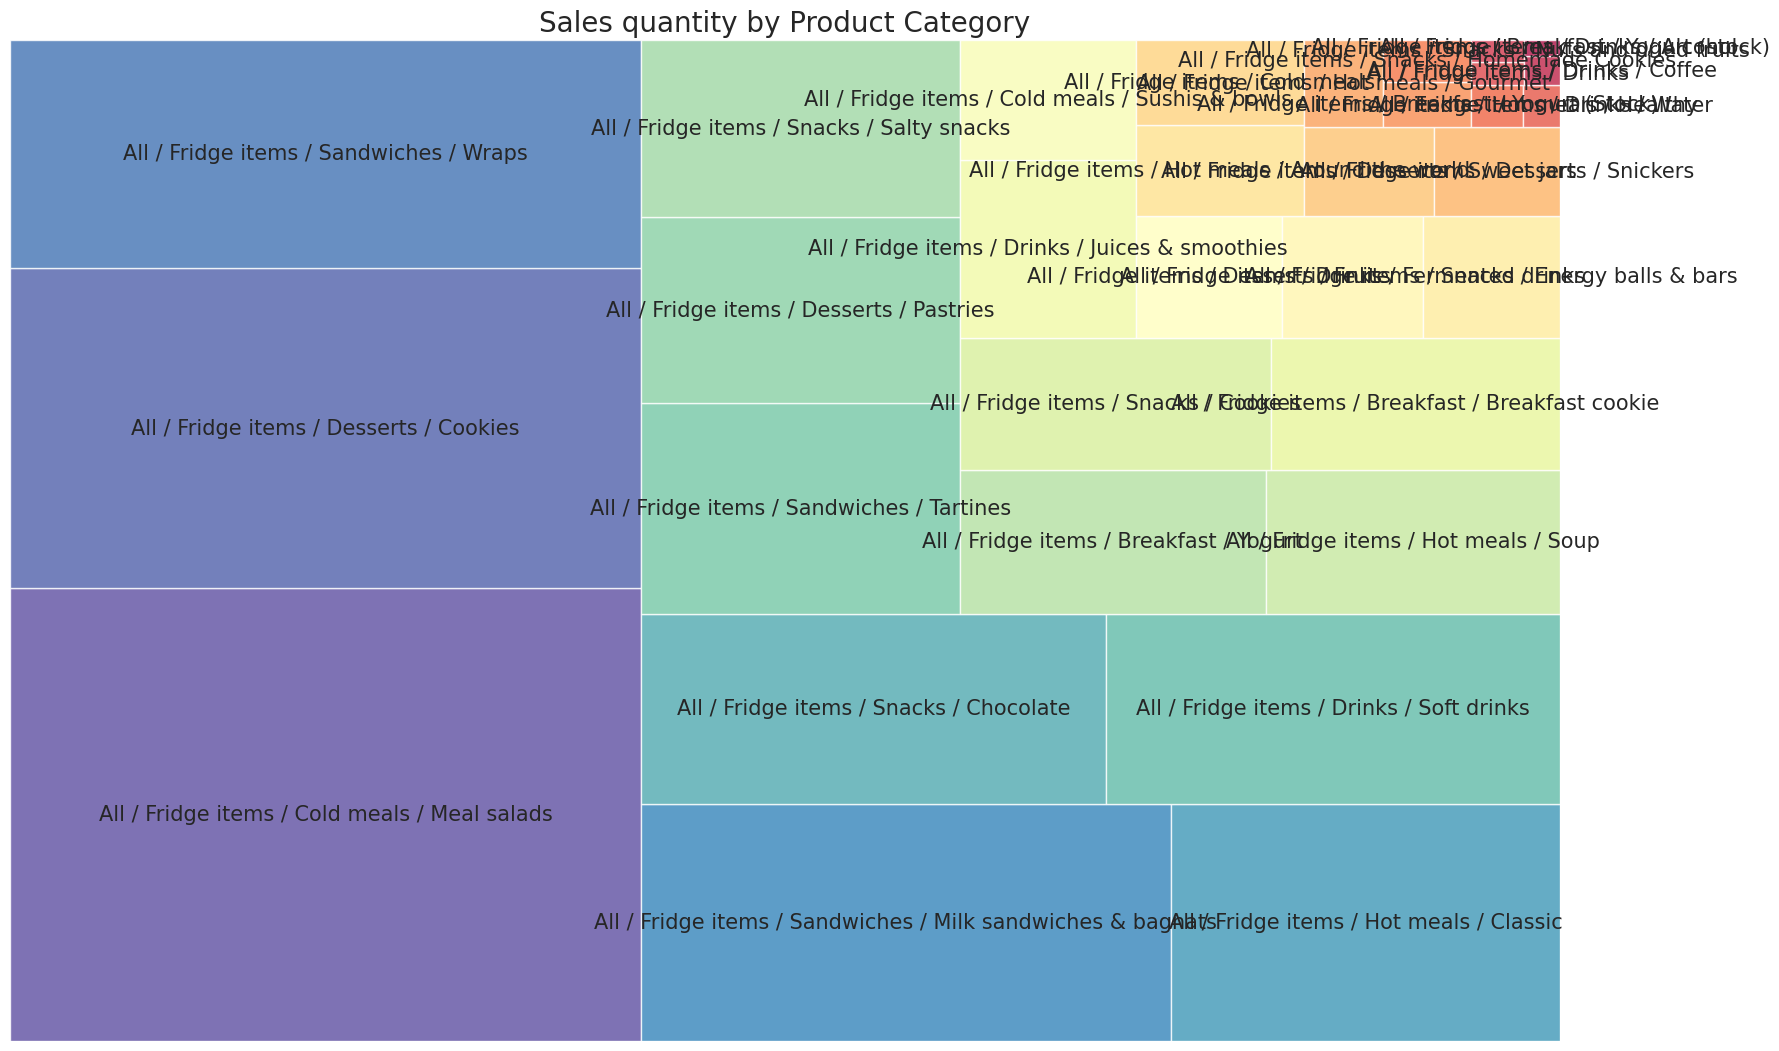

In [ ]:
!pip install squarify
import squarify
# Customize matplotlib font sizes
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'axes.labelsize': 20})
# Create a treemap
plt.figure(figsize=(20, 13))
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(category_sales_quantity_sorted['Quantity'])))
squarify.plot(sizes=category_sales_quantity_sorted['Quantity'],
              label=category_sales_quantity_sorted['Product Category'],
              alpha=0.8, color=colors)
plt.axis('off')
plt.title('Sales quantity by Product Category')
plt.show()

## **Most revenue generated product**

In [ ]:
category_sales = data.groupby('Product Category')['Subtotal'].sum().reset_index()

# Sort the results to find the highest selling categories
category_sales_sorted = category_sales.sort_values('Subtotal', ascending=False)

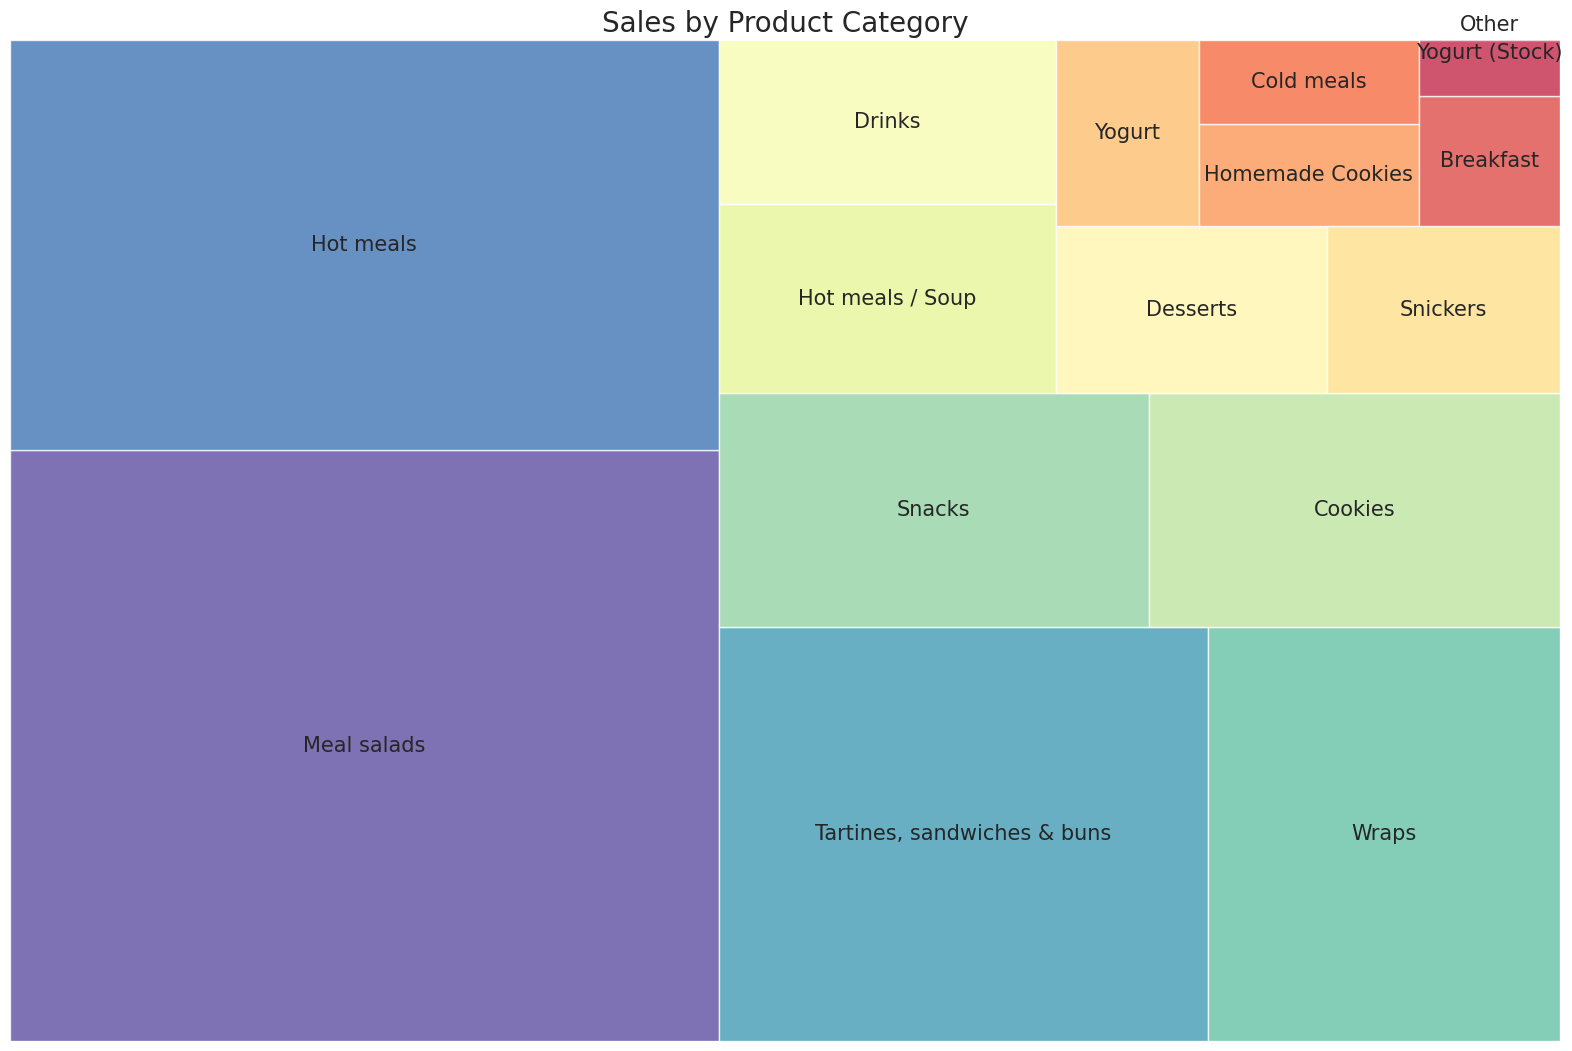

In [ ]:
# Customize matplotlib font sizes
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'axes.labelsize': 20})
# Create a treemap
plt.figure(figsize=(20, 13))
colors = plt.cm.Spectral_r(np.linspace(0, 1, len(category_sales_sorted['Subtotal'])))
squarify.plot(sizes=category_sales_sorted['Subtotal'],
              label=category_sales_sorted['Product Category'],
              alpha=0.8, color=colors)
plt.axis('off')
plt.title('Sales by Product Category')
plt.show()

In [ ]:
product_sales = data.groupby('Product Category')['Subtotal'].sum().reset_index(name='Total_Sales')
product_sales_sorted = product_sales.sort_values('Total_Sales', ascending=False)
print(product_sales_sorted.head(17))

                                     Product Category  Total_Sales
5       All / Fridge items / Cold meals / Meal salads    185927.86
20           All / Fridge items / Hot meals / Classic     55980.12
26            All / Fridge items / Sandwiches / Wraps     54045.61
24  All / Fridge items / Sandwiches / Milk sandwic...     51110.66
7             All / Fridge items / Desserts / Cookies     39375.45
25         All / Fridge items / Sandwiches / Tartines     24773.11
27            All / Fridge items / Snacks / Chocolate     14820.56
6    All / Fridge items / Cold meals / Sushis & bowls     14438.54
9            All / Fridge items / Desserts / Pastries     13326.82
17          All / Fridge items / Drinks / Soft drinks     13036.98
1             All / Fridge items / Breakfast / Yogurt     12376.90
23              All / Fridge items / Hot meals / Soup     11956.22
19  All / Fridge items / Hot meals / Around the world     10531.54
4                     All / Fridge items / Cold meals      982

In [ ]:
# First, calculate the total sales and total quantity sold for each category
category_totals = data.groupby('Product Category').agg({
    'Subtotal': 'sum',
    'Quantity': 'sum',
    'Total Cost': 'sum'
}).reset_index()

# Calculate Sales/Quantity ratio for each category
category_totals['Sales/Quantity Ratio'] = category_totals['Subtotal'] / category_totals['Quantity']

# Calculate profit for each category
category_totals['Profit'] = category_totals['Subtotal'] - category_totals['Total Cost']

# Calculate profit margin as a percentage of total sales
category_totals['Profit Margin (%)'] = (category_totals['Profit'] / category_totals['Subtotal']) * 100

# Sort categories by Sales/Quantity Ratio
category_totals.sort_values('Sales/Quantity Ratio', ascending=False, inplace=True)

# Display the results
print(category_totals[['Product Category', 'Sales/Quantity Ratio', 'Profit Margin (%)']])

                                     Product Category  Sales/Quantity Ratio  \
21           All / Fridge items / Hot meals / Gourmet              8.217449   
19  All / Fridge items / Hot meals / Around the world              8.195751   
4                     All / Fridge items / Cold meals              8.120298   
6    All / Fridge items / Cold meals / Sushis & bowls              8.097891   
22           All / Fridge items / Hot meals / Healthy              7.762912   
5       All / Fridge items / Cold meals / Meal salads              7.693779   
20           All / Fridge items / Hot meals / Classic              7.164997   
24  All / Fridge items / Sandwiches / Milk sandwic...              4.804988   
26            All / Fridge items / Sandwiches / Wraps              4.439429   
25         All / Fridge items / Sandwiches / Tartines              4.369155   
11         All / Fridge items / Desserts / Sweet jars              3.417518   
23              All / Fridge items / Hot meals / Sou

<ipython-input-16-007322cd8667>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category_data['Product Category'], rotation=45, ha="right")


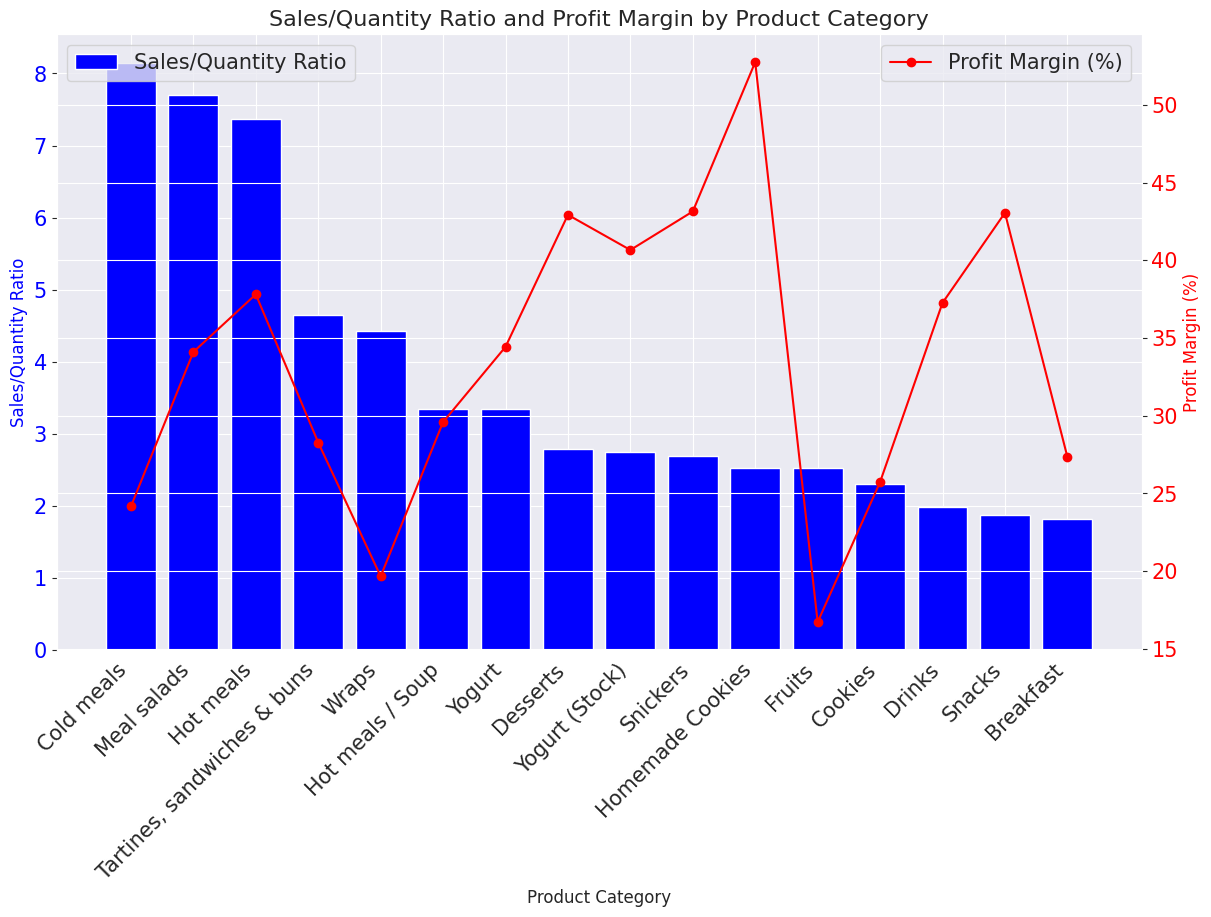

In [ ]:
category_data = pd.DataFrame({
    'Product Category': [
        'Cold meals', 'Meal salads', 'Hot meals', 'Tartines, sandwiches & buns', 'Wraps',
        'Hot meals / Soup', 'Yogurt', 'Desserts', 'Yogurt (Stock)', 'Snickers',
        'Homemade Cookies', 'Fruits', 'Cookies', 'Drinks', 'Snacks', 'Breakfast'
    ],
    'Sales/Quantity Ratio': [
        8.138958, 7.694716, 7.373127, 4.655591, 4.431928,
        3.343229, 3.338801, 2.786034, 2.751108, 2.696569,
        2.528131, 2.521430, 2.301302, 1.979384, 1.870872, 1.814482
    ],
    'Profit Margin (%)': [
        24.162803, 34.094013, 37.803299, 28.269575, 19.659248,
        29.583420, 34.425259, 42.920692, 40.657547, 43.138520,
        52.748512, 16.713912, 25.728800, 37.255023, 43.048818, 27.350651
    ]
})

# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot 'Sales/Quantity Ratio' as bars
ax1.bar(category_data['Product Category'], category_data['Sales/Quantity Ratio'], color='blue', label='Sales/Quantity Ratio')

# Create a secondary y-axis for 'Profit Margin (%)'
ax2 = ax1.twinx()
ax2.plot(category_data['Product Category'], category_data['Profit Margin (%)'], color='red', marker='o', label='Profit Margin (%)')

# Labels and title
ax1.set_xlabel('Product Category', fontsize=12)
ax1.set_ylabel('Sales/Quantity Ratio', color='blue', fontsize=12)
ax2.set_ylabel('Profit Margin (%)', color='red', fontsize=12)
plt.title('Sales/Quantity Ratio and Profit Margin by Product Category', fontsize=16)

# Ticks and legend
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_xticklabels(category_data['Product Category'], rotation=45, ha="right")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

##**Temporal Analysis**
## **particular months or times of the year when sales peak**

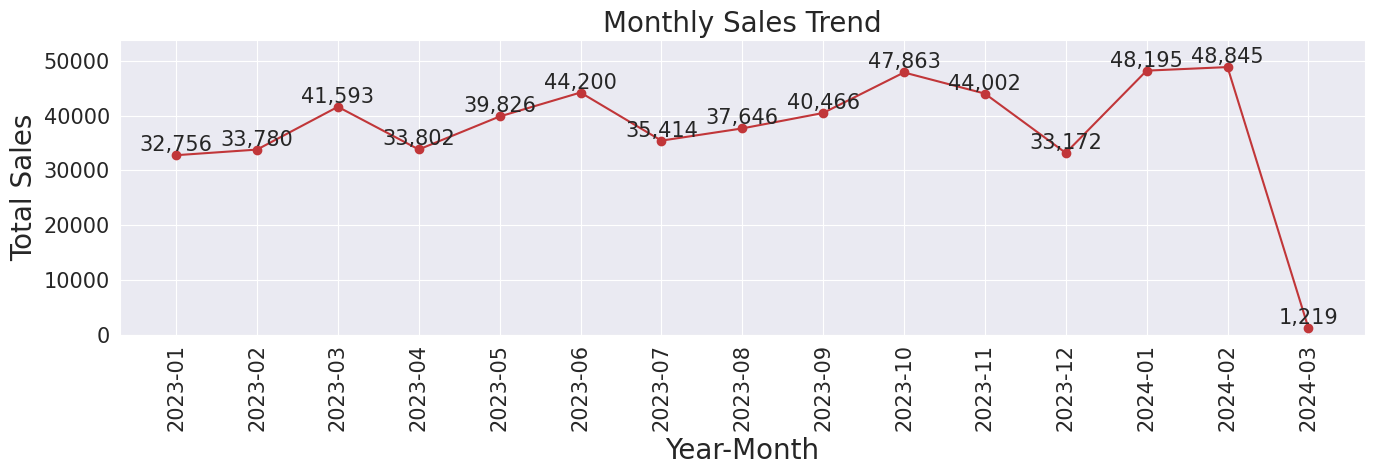

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
# Create 'YearMonth' as a PeriodIndex for monthly aggregation
data['YearMonth'] = data['Date'].dt.to_period('M')

# Sum sales by 'YearMonth'
monthly_sales = data.groupby('YearMonth')['Subtotal'].sum().reset_index()

# Create a date range that includes all months from the start to the end of your dataset
start_period = data['YearMonth'].min()
end_period = data['YearMonth'].max()
date_range = pd.period_range(start=start_period, end=end_period, freq='M')

# Create a DataFrame from the date range
date_df = pd.DataFrame(date_range, columns=['YearMonth'])

# Merge the complete date range with the monthly sales data
# Make sure both DataFrames have the 'YearMonth' column before merging
monthly_sales_full = pd.merge(date_df, monthly_sales, on='YearMonth', how='left').fillna(0)

# Plotting the monthly sales trend
plt.figure(figsize=(14, 5))
plt.plot(monthly_sales_full['YearMonth'].astype(str), monthly_sales_full['Subtotal'], marker='o', linestyle='-')
for x, y in zip(monthly_sales_full['YearMonth'].astype(str), monthly_sales_full['Subtotal']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.grid(True)
plt.ylim(0, monthly_sales_full['Subtotal'].max() * 1.1)
plt.show()

#**2. Customer Behavior Analysis :**

##Customer Segmentation

##Segment client by average basket in €

##First method for averaging

                                       Customer  Average Basket
0     *** GDPR removed *** *** GDPR removed ***        6.954590
1                                         AN LE        6.267273
2                                         Aa Jj        2.220000
3                               Aaron De Cremer        3.870000
4                                 Aaron Truyens        5.280000
...                                         ...             ...
5546                                 yiran wang        3.831818
5547                                  yue chang        8.020000
5548                             yves geysegoms        3.087778
5549                             Édouard  Polet        7.563846
5550                                Özlem Geren        4.895000

[5551 rows x 2 columns]


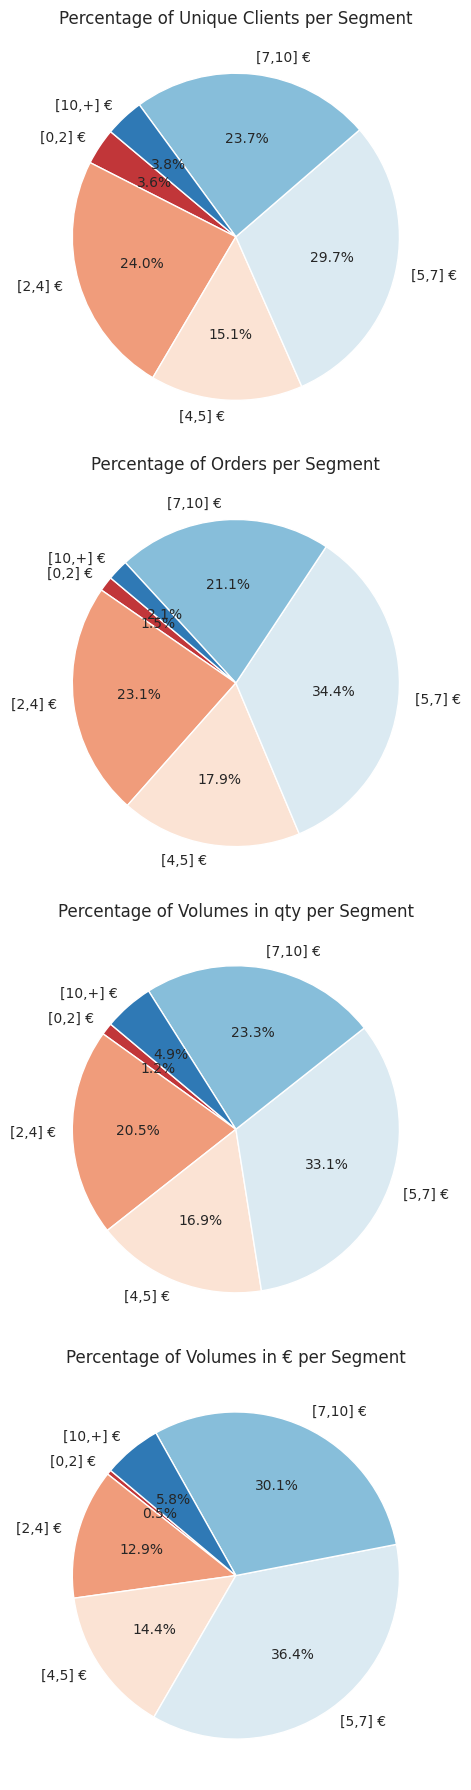

In [ ]:
# Convert 'Date' column to datetime
data['Order Lines/Order Reference/Order Date'] = pd.to_datetime(data['Order Lines/Order Reference/Order Date'])

# Filter data from October 2023 to the current date
start_date = "2023-10-01"
end_date = pd.to_datetime("now", utc=True).strftime('%Y-%m-%d')
filtered_df = data[(data['Order Lines/Order Reference/Order Date'] >= start_date) & (data['Order Lines/Order Reference/Order Date'] <= end_date)]

# Compute the subtotal for each order
order_totals = filtered_df.groupby(['Order Lines/Customer/Full Name','Order Lines/Order Reference'])['Order Lines/Subtotal'].sum().reset_index()

# Calculate the average basket size per customer
customer_averages = order_totals.groupby('Order Lines/Customer/Full Name')['Order Lines/Subtotal'].mean().reset_index()
customer_averages.columns = ['Customer', 'Average Basket']

print(customer_averages)

# Define the basket size segments
bins = [0, 2, 4, 5, 7, 10, float('inf')]
labels = ['[0,2] €', '[2,4] €', '[4,5] €', '[5,7] €', '[7,10] €', '[10,+] €']
customer_averages['Segment'] = pd.cut(customer_averages['Average Basket'], bins=bins, labels=labels, right=False)
# Merge the segment data back into the filtered DataFrame
segmented_data = filtered_df.merge(customer_averages[['Customer', 'Segment']], left_on='Order Lines/Customer/Full Name', right_on='Customer', how='left')

# Aggregate data for each segment
segment_summary = segmented_data.groupby('Segment').agg(
    Number_of_Unique_Clients=('Customer', 'nunique'),
    Number_of_Sale_Orders=('Order Lines/Order Reference', 'nunique'),
    Volumes_in_qty=('Order Lines/Quantity', 'sum'),
    Volumes_in_Euro=('Order Lines/Subtotal', 'sum')
).reset_index()

# Calculate percentages for plotting
segment_summary['% of Clients'] = (segment_summary['Number_of_Unique_Clients'] / segment_summary['Number_of_Unique_Clients'].sum()) * 100
segment_summary['% of Orders'] = (segment_summary['Number_of_Sale_Orders'] / segment_summary['Number_of_Sale_Orders'].sum()) * 100
segment_summary['% of qty'] = (segment_summary['Volumes_in_qty'] / segment_summary['Volumes_in_qty'].sum()) * 100
segment_summary['% of Volumes'] = (segment_summary['Volumes_in_Euro'] / segment_summary['Volumes_in_Euro'].sum()) * 100


# Plotting the four pie charts
fig, axs = plt.subplots(4, figsize=(10, 18))

# Plot % of unique clients per segment
axs[0].pie(segment_summary['% of Clients'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Percentage of Unique Clients per Segment')

# Plot % of orders per segment
axs[1].pie(segment_summary['% of Orders'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Percentage of Orders per Segment')

# Plot % of volumes in qty per segment
axs[2].pie(segment_summary['% of qty'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axs[2].set_title('Percentage of Volumes in qty per Segment')

# Plot % of volumes in € per segment
axs[3].pie(segment_summary['% of Volumes'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axs[3].set_title('Percentage of Volumes in € per Segment')

# Display the plots
plt.tight_layout()
plt.show()

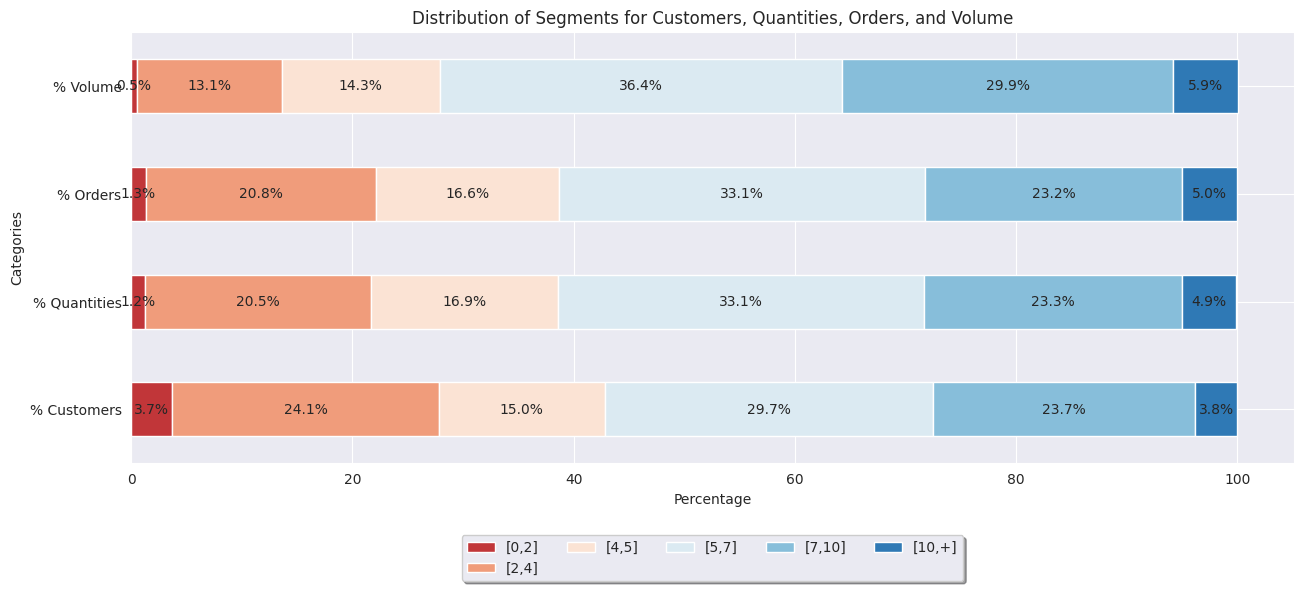

In [ ]:

data = {
    'Segments': ['[0,2]', '[2,4]', '[4,5]', '[5,7]', '[7,10]', '[10,+]'],
    '% Customers': [3.7, 24.1, 15, 29.7, 23.7, 3.8],
    '% Quantities' : [1.2, 20.5, 16.9, 33.1, 23.3, 4.9],
    '% Orders': [1.3, 20.8, 16.6, 33.1, 23.2, 5],
    '% Volume': [0.5, 13.1, 14.3, 36.4, 29.9, 5.9]
}

# Convert the data to a DataFrame and set 'Segments' as the index
df = pd.DataFrame(data)
df.set_index('Segments', inplace=True)

# Transpose the DataFrame so the segments become the stacks
df_transposed = df.T

# Create a horizontal stacked bar chart
ax=df_transposed.plot(kind='barh', stacked=True, figsize=(15, 7))

# Annotate the percentages on the bars
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f%%" % (width), xy=(left+width/2, bottom+height/2),
                ha='center', va='center')

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Categories')
ax.set_title('Distribution of Segments for Customers, Quantities, Orders, and Volume')

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.2, box.width, box.height * 0.8])

# Place the legend below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

# Show the plot with the legend below
plt.show()

# Show the plot with percentages
plt.show()

**High Engement:** Segments [5,7] and [7,10] are the most engaged, showing a high volume of purchases and contributing most significantly to sales. These customers are likely the core of the business and should be the focus of retention strategies and loyalty programs.

The [10,+] segment, despite being small, has customers who make large purchases. They present an opportunity for targeted marketing of premium or bulk products.

**Potential growth:** The [2,4] and [4,5] segments have a good mix of customers, orders, and volume, suggesting room for growth if they can be encouraged to increase their basket size slightly.

**Low Engagement:** The [0,2] segment has the lowest engagement and spending, potentially representing occasional shoppers or those purchasing only specific, low-cost items. This segment could be targeted with promotions or offers to increase their basket size.


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Extract year and month from 'Date' and create a new column for it
data['YearMonth'] = data['Date'].dt.to_period('M')

# Group by Client and YearMonth, then count the number of sale orders
monthly_orders = data.groupby(['Customer','Order Lines/Order Reference', 'YearMonth']).size().reset_index(name='Sale Orders')
print(monthly_orders)
# Calculate the average number of sale orders per month per client
average_monthly_orders = monthly_orders.groupby('Customer')['Sale Orders'].mean().reset_index(name='Average Monthly Orders')

average_monthly_orders

KeyError: 'Date'

##Second method for averaging

Text(0.5, 1.0, 'Percentage of Volume per Segment')

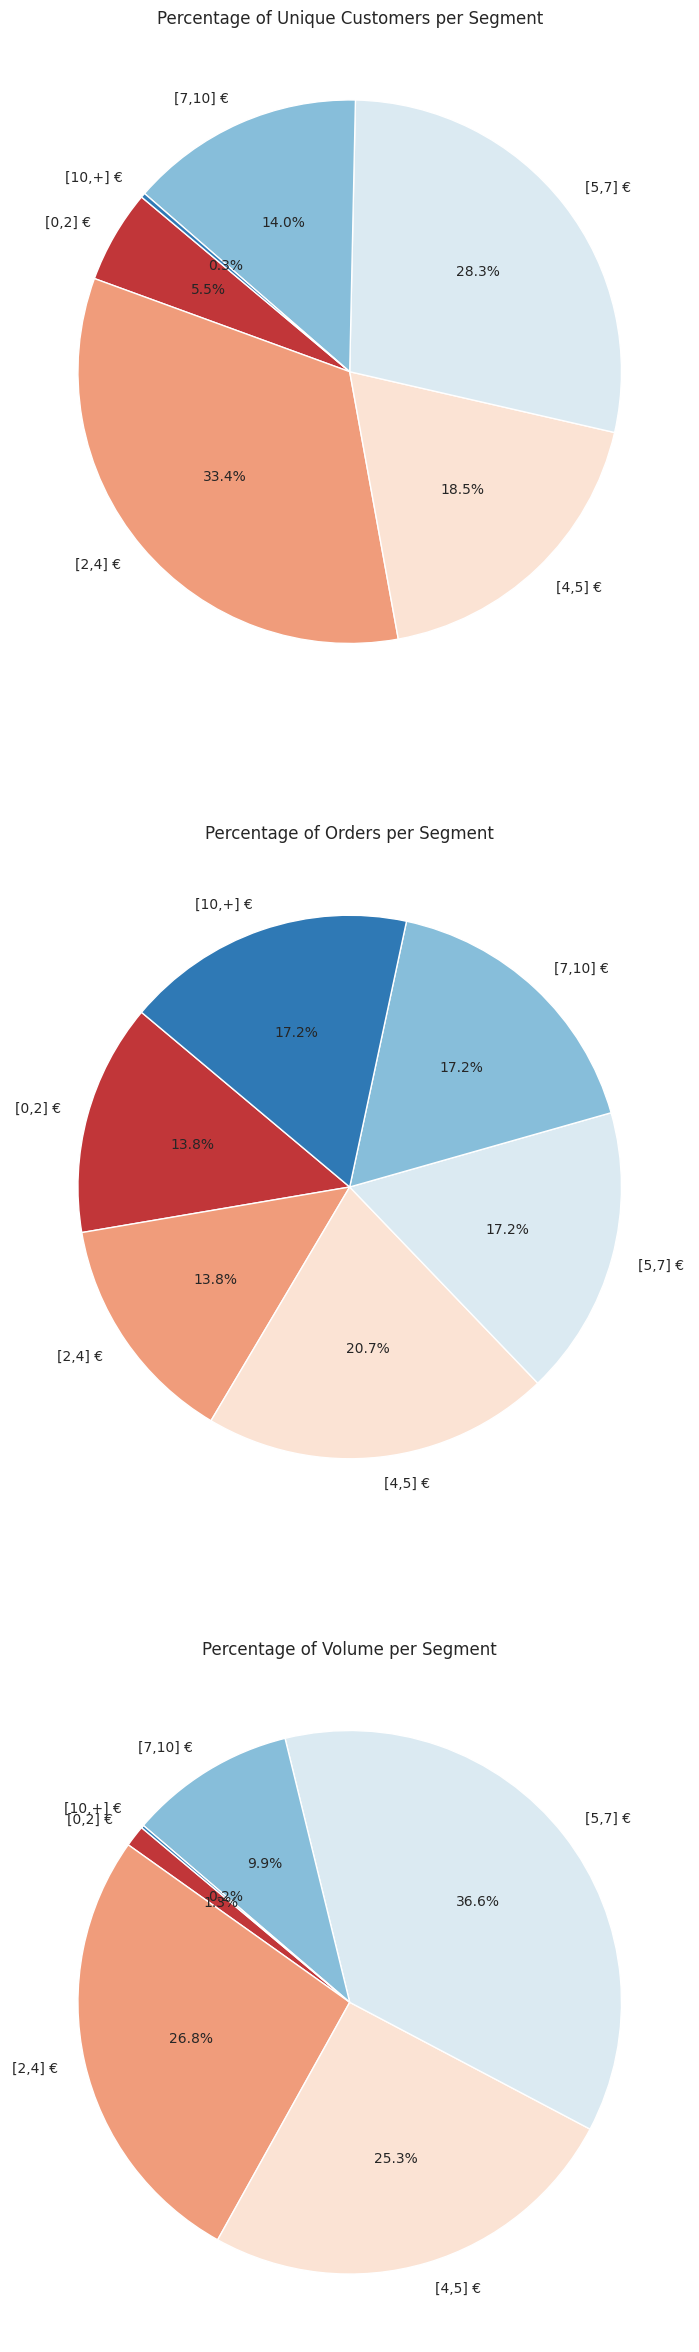

In [ ]:
# Filter the data for dates from October 2023 to the current date and exclude 'Other' category
df = data[(data['Date'] >= '2023-10-01') ]

# Calculate the average basket per customer
average_basket = df.groupby('Customer')['Subtotal'].mean().reset_index(name='Average Basket')

# Define the segments
bins = [0, 2, 4, 5, 7, 10, float('inf')]
labels = ['[0,2] €', '[2,4] €', '[4,5] €', '[5,7] €', '[7,10] €', '[10,+] €']
average_basket['Segment'] = pd.cut(average_basket['Average Basket'], bins=bins, labels=labels, right=False)

# Merge the 'Segment' information back into the original filtered DataFrame
filtered_data = df.merge(average_basket[['Customer', 'Segment']], on='Customer', how='left')

segment_summary = filtered_data.groupby('Segment').agg({
    'Customer': pd.Series.nunique,
    'Quantity': 'count',
    'Subtotal': 'sum'
}).reset_index()

# Calculate percentages for each segment
segment_summary['% Customers'] = (segment_summary['Customer'] / segment_summary['Customer'].sum()) * 100
segment_summary['% Orders'] = (segment_summary['Quantity'] / segment_summary['Quantity'].sum()) * 100
segment_summary['% Volume'] = (segment_summary['Subtotal'] / segment_summary['Subtotal'].sum()) * 100

# Plotting
# Define the figure size and layout
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 30))

# Plot % of unique customers per segment
axes[0].pie(segment_summary['% Customers'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Percentage of Unique Customers per Segment')

# Plot % of orders per segment
axes[1].pie(segment_summary['% Orders'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Percentage of Orders per Segment')

# Plot % of volumes in € per segment
axes[2].pie(segment_summary['% Volume'], labels=segment_summary['Segment'], autopct='%1.1f%%', startangle=140)
axes[2].set_title('Percentage of Volume per Segment')

In [ ]:
print(average_basket)

                                       Customer  Average Basket   Segment
0     *** GDPR removed *** *** GDPR removed ***        5.313333   [5,7] €
1                                         AN LE        6.413333   [5,7] €
2                                         Aa Jj        2.220000   [2,4] €
3                               Aaron De Cremer        3.870000   [2,4] €
4                                 Aaron Truyens        5.280000   [5,7] €
...                                         ...             ...       ...
5155                                 yiran wang        3.541111   [2,4] €
5156                                  yue chang        8.020000  [7,10] €
5157                             yves geysegoms        2.626667   [2,4] €
5158                             Édouard  Polet        7.023571  [7,10] €
5159                                Özlem Geren        6.130000   [5,7] €

[5160 rows x 3 columns]


##Segment client per use of fridge:

In [ ]:
# Filter the data for dates from October 2023 to the current date
df = data[(data['Date'] >= '2023-10-01')]

# Compute the total number of Sale Order per client
orders_per_client = df.groupby('Customer').size().reset_index(name='Total Orders')

# Define the segments
bins = [0, 2, 10, 20, 50, 100, float('inf')]
labels = ['[0,2] orders', '[2,10] orders', '[10,20] orders', '[20,50] orders', '[50,100] orders', '[100,+] orders']
orders_per_client['Segment'] = pd.cut(orders_per_client['Total Orders'], bins=bins, labels=labels, right=False)

# Merge the 'Segment' information back into the original filtered DataFrame
filtered_data = df.merge(orders_per_client[['Customer', 'Segment']], on='Customer', how='left')

# For each classification group, compute the metrics
segment_summary = filtered_data.groupby('Segment').agg({
    'Customer': pd.Series.nunique,
    'Quantity': 'count',
    'Subtotal': 'sum'
}).reset_index()

# Rename the columns for clarity
segment_summary.columns = ['Segment', 'Number of Unique Clients', 'Number of Sale Orders', 'Volumes in €']

segment_summary

,Segment,Number of Unique Clients,Number of Sale Orders,Volumes in €
0,"[0,2] orders",1059,1059,5497.35
1,"[2,10] orders",2524,11350,53829.22
2,"[10,20] orders",868,11921,53960.88
3,"[20,50] orders",589,17349,74530.63
4,"[50,100] orders",103,6672,26992.65
5,"[100,+] orders",17,2118,8485.13


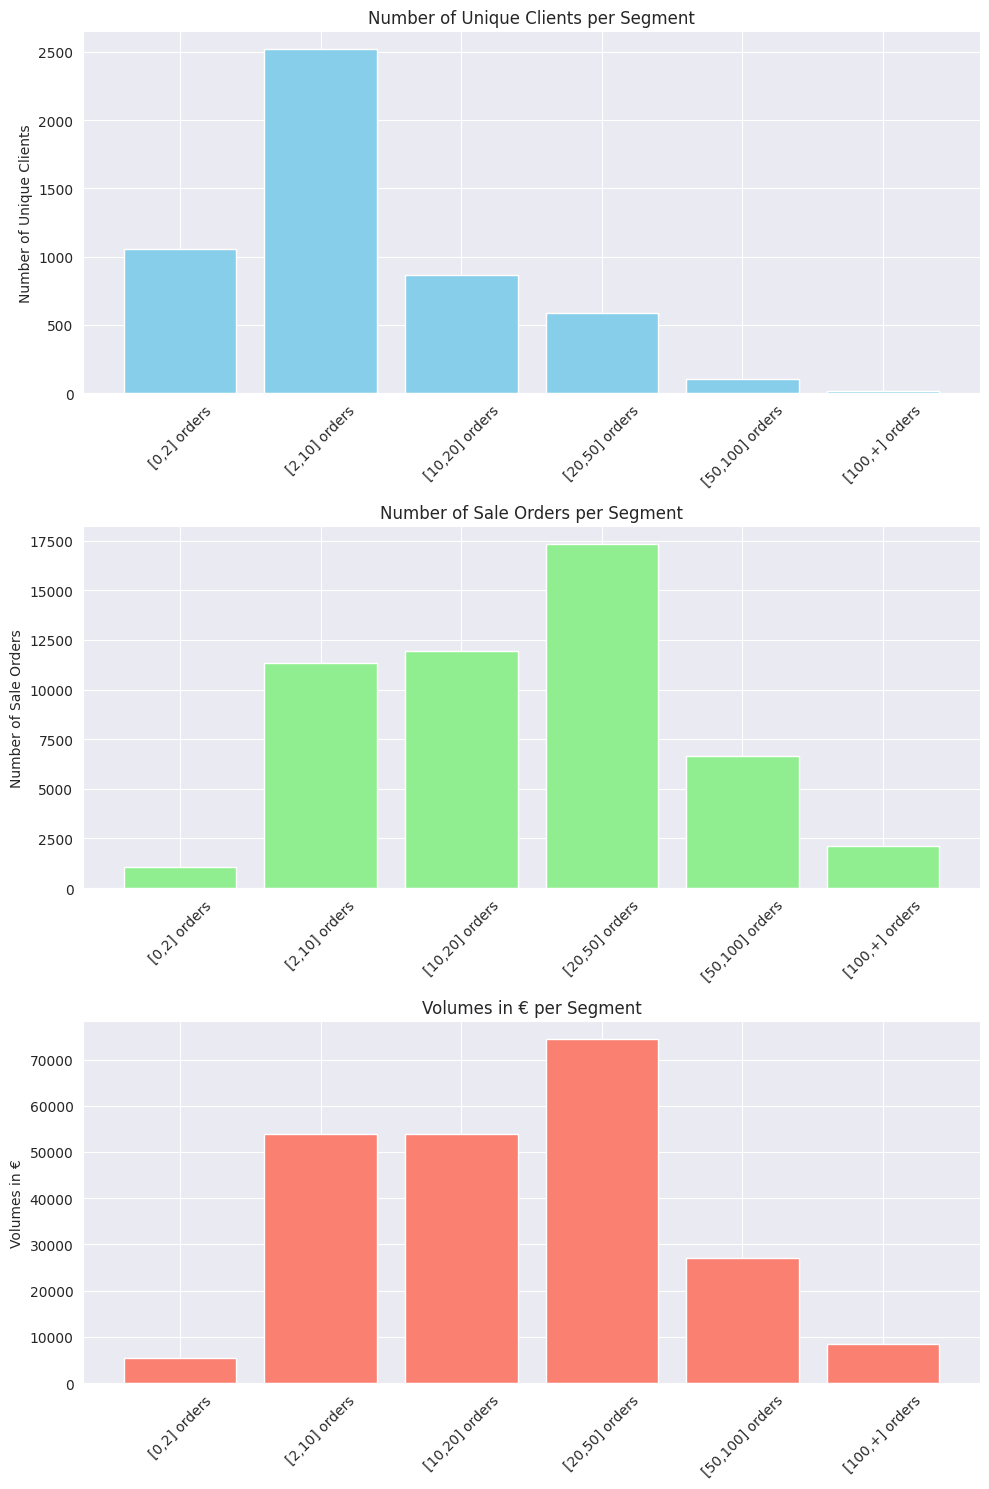

In [ ]:
# Plotting
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15), tight_layout=True)

# Number of Unique Clients
axes[0].bar(segment_summary['Segment'], segment_summary['Number of Unique Clients'], color='skyblue')
axes[0].set_title('Number of Unique Clients per Segment')
axes[0].set_ylabel('Number of Unique Clients')
axes[0].tick_params(axis='x', rotation=45)

# Number of Sale Orders
axes[1].bar(segment_summary['Segment'], segment_summary['Number of Sale Orders'], color='lightgreen')
axes[1].set_title('Number of Sale Orders per Segment')
axes[1].set_ylabel('Number of Sale Orders')
axes[1].tick_params(axis='x', rotation=45)

# Volumes in €
axes[2].bar(segment_summary['Segment'], segment_summary['Volumes in €'], color='salmon')
axes[2].set_title('Volumes in € per Segment')
axes[2].set_ylabel('Volumes in €')
axes[2].tick_params(axis='x', rotation=45)

plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

filtered_data = data[(data['Date'] >= '2023-10-01')].copy()

# Extract year and month from 'Date' and create a new column for it
filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')

# Group by Customer and YearMonth, then sum the Subtotal to get the total spend per client per month
monthly_spend = filtered_data.groupby(['Customer', 'YearMonth'])['Subtotal'].sum().reset_index()

# Calculate the average monthly spend per client
average_monthly_spend = monthly_spend.groupby('Customer')['Subtotal'].mean().reset_index(name='Average Monthly Spend')

# Corrected bins and labels
bins = [0, 2, 4, 5, 7, 10, float('inf')]
labels = ['[0,2] €', '[2,4] €', '[4,5] €', '[5,7] €', '[7,10] €', '[10,+] €']  # Corrected duplicate and missing segments
average_monthly_spend['Basket Segment'] = pd.cut(average_monthly_spend['Average Monthly Spend'], bins=bins, labels=labels, right=False)

# Group by Basket Segment and calculate the average monthly spend for clients within each segment
segment_spend_summary = average_monthly_spend.groupby('Basket Segment')['Average Monthly Spend'].mean().reset_index()

segment_spend_summary

,Basket Segment,Average Monthly Spend
0,"[0,2] €",1.762083
1,"[2,4] €",3.094105
2,"[4,5] €",4.564286
3,"[5,7] €",5.844543
4,"[7,10] €",8.443140
5,"[10,+] €",21.645434


# Top Customers

##Top Customers by number of orders

In [ ]:
# First, we will create a new column 'Order_ID' which combines customer name and order date to uniquely identify each order
data['Order_ID'] = data['Customer'] + '_' + data['Date'].astype(str)

# Now, group by 'Order_ID' to count unique products per order
order_counts = data.groupby('Order_ID')['Product Category'].nunique().reset_index(name='Unique_Products_Per_Order')

# Count the number of orders per customer
customer_order_counts = order_counts['Order_ID'].str.split('_', expand=True)[0].value_counts().reset_index(name='Number_of_Orders')
customer_order_counts.columns = ['Customer', 'Number_of_Orders']

# Display the result
print(customer_order_counts)

                    Customer  Number_of_Orders
0                 Malte  Ahl               180
1            Wouter Bervoets               169
2          Simona Storobelea               156
3         Mathieu Deceuninck               152
4            Erwan Le Moigne               147
...                      ...               ...
7752  Kristof  Van den Bergh                 1
7753          Roel Peerlinck                 1
7754       Kristof Holsteens                 1
7755          Rodrigue  Dion                 1
7756     Clara Van Kerckhove                 1

[7757 rows x 2 columns]


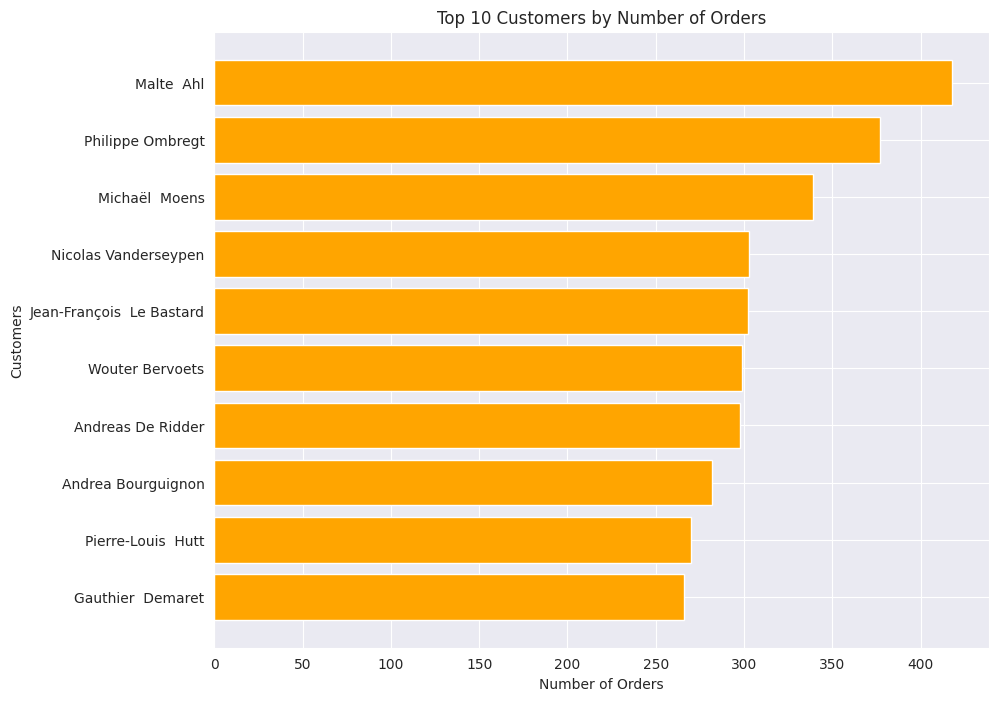

In [ ]:
top_n = 10  # Focus on the top 10 customers
top_customers = data.head(top_n)
customer_orders = data.groupby('Customer')['Quantity'].sum().reset_index(name='Total_Quantity_Ordered')
# Sort by 'Total_Quantity_Ordered'
top_customers = customer_orders.sort_values(by='Total_Quantity_Ordered', ascending=False).head(top_n)

# Now, plot the top N customers
plt.figure(figsize=(10, 8))
plt.barh(top_customers['Customer'], top_customers['Total_Quantity_Ordered'], color='orange')
plt.xlabel('Number of Orders')
plt.ylabel('Customers')
plt.title(f'Top {10} Customers by Number of Orders')
plt.gca().invert_yaxis()  # To display the top customer at the top of the chart
plt.show()

## Top Customers by sales

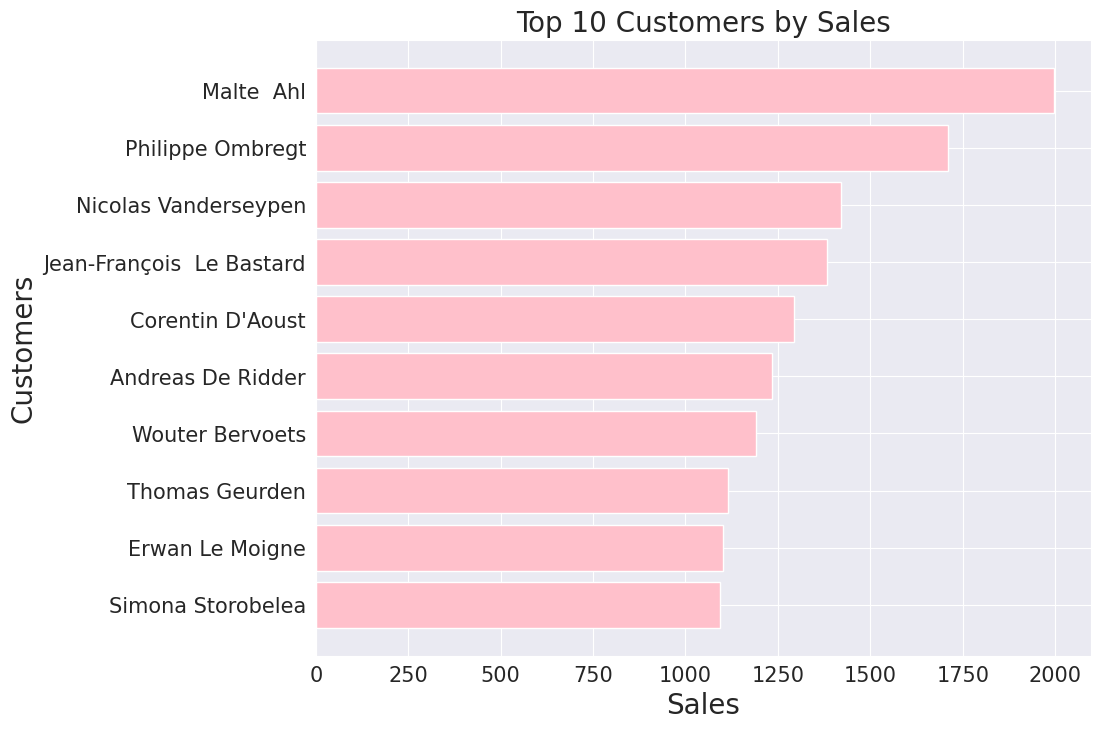

In [ ]:
top_n = 10  # Focus on the top 10 customers
top_customers = data.head(top_n)
customer_orders = data.groupby('Customer')['Subtotal'].sum().reset_index(name='Total_Sales_Ordered')
# Sort by 'Total_Sales_Ordered'
top_customers = customer_orders.sort_values(by='Total_Sales_Ordered', ascending=False).head(top_n)

# Now, plot the top N customers
plt.figure(figsize=(10, 8))
plt.barh(top_customers['Customer'], top_customers['Total_Sales_Ordered'], color='pink')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.title(f'Top {10} Customers by Sales')
plt.gca().invert_yaxis()  # To display the top customer at the top of the chart
plt.show()

##Distribution of orders per customers

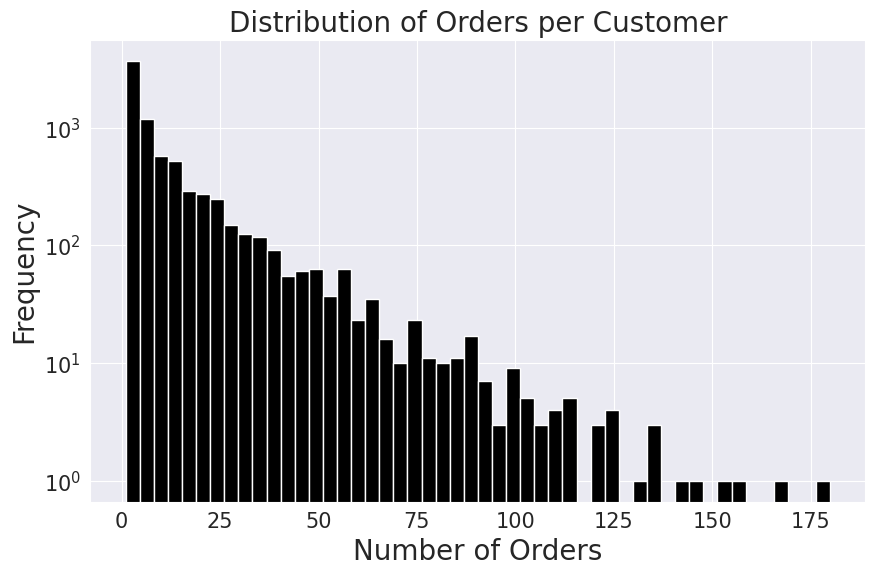

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(customer_order_counts['Number_of_Orders'], bins=50, color='black', edgecolor='white')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.yscale('log')  # Use logarithmic scale to better visualize wide distributions
plt.show()

##Analyzing top 10 customer purchasing patterns

# **Basket Analysis**

**Evaluate common product combinations purchased together**

**Analyze how product bundling or promotions affect basket size and composition**

#**3.Product Performance**

## Profitability Analysis
**Calculating profit margins for each product or product category**

In [ ]:
# First, we need to calculate the profit for each product or category
data['Profit'] = data['Subtotal'] - data['Total Cost']
# Then, we group by 'Product Category' and sum up the 'Profit' and 'Subtotal'
category_profits = data.groupby('Product Category').agg({'Profit': 'sum','Subtotal': 'sum'}).reset_index()
# Now, we calculate the profit margin percentage for each category
category_profits['Profit Margin (%)'] = (category_profits['Profit'] / category_profits['Subtotal']) * 100

# Optionally, sort the results by profit margin to find the most profitable categories
category_profits_sorted = category_profits.sort_values('Profit Margin (%)', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(category_profits_sorted)

                                     Product Category    Profit   Subtotal  \
0      All / Fridge items / Snacks / Homemade Cookies    421.02     793.79   
1                 All / Fridge items / Drinks / Water     87.16     166.36   
2               All / Fridge items / Drinks / Alcohol      5.72      11.12   
3                         All / Fridge items / Drinks    137.29     277.75   
4     All / Fridge items / Breakfast / Yogurt (stock)     55.42     113.50   
5               All / Fridge items / Snacks / Cookies   3035.95    6238.39   
6   All / Fridge items / Snacks / Nuts and dried f...    104.00     226.50   
7            All / Fridge items / Desserts / Pastries   6000.05   13326.82   
8             All / Fridge items / Snacks / Chocolate   6540.97   14820.56   
9            All / Fridge items / Desserts / Snickers   1092.61    2547.61   
10   All / Fridge items / Drinks / Juices & smoothies   2782.45    6566.28   
11  All / Fridge items / Snacks / Energy balls & bars   1100.84 

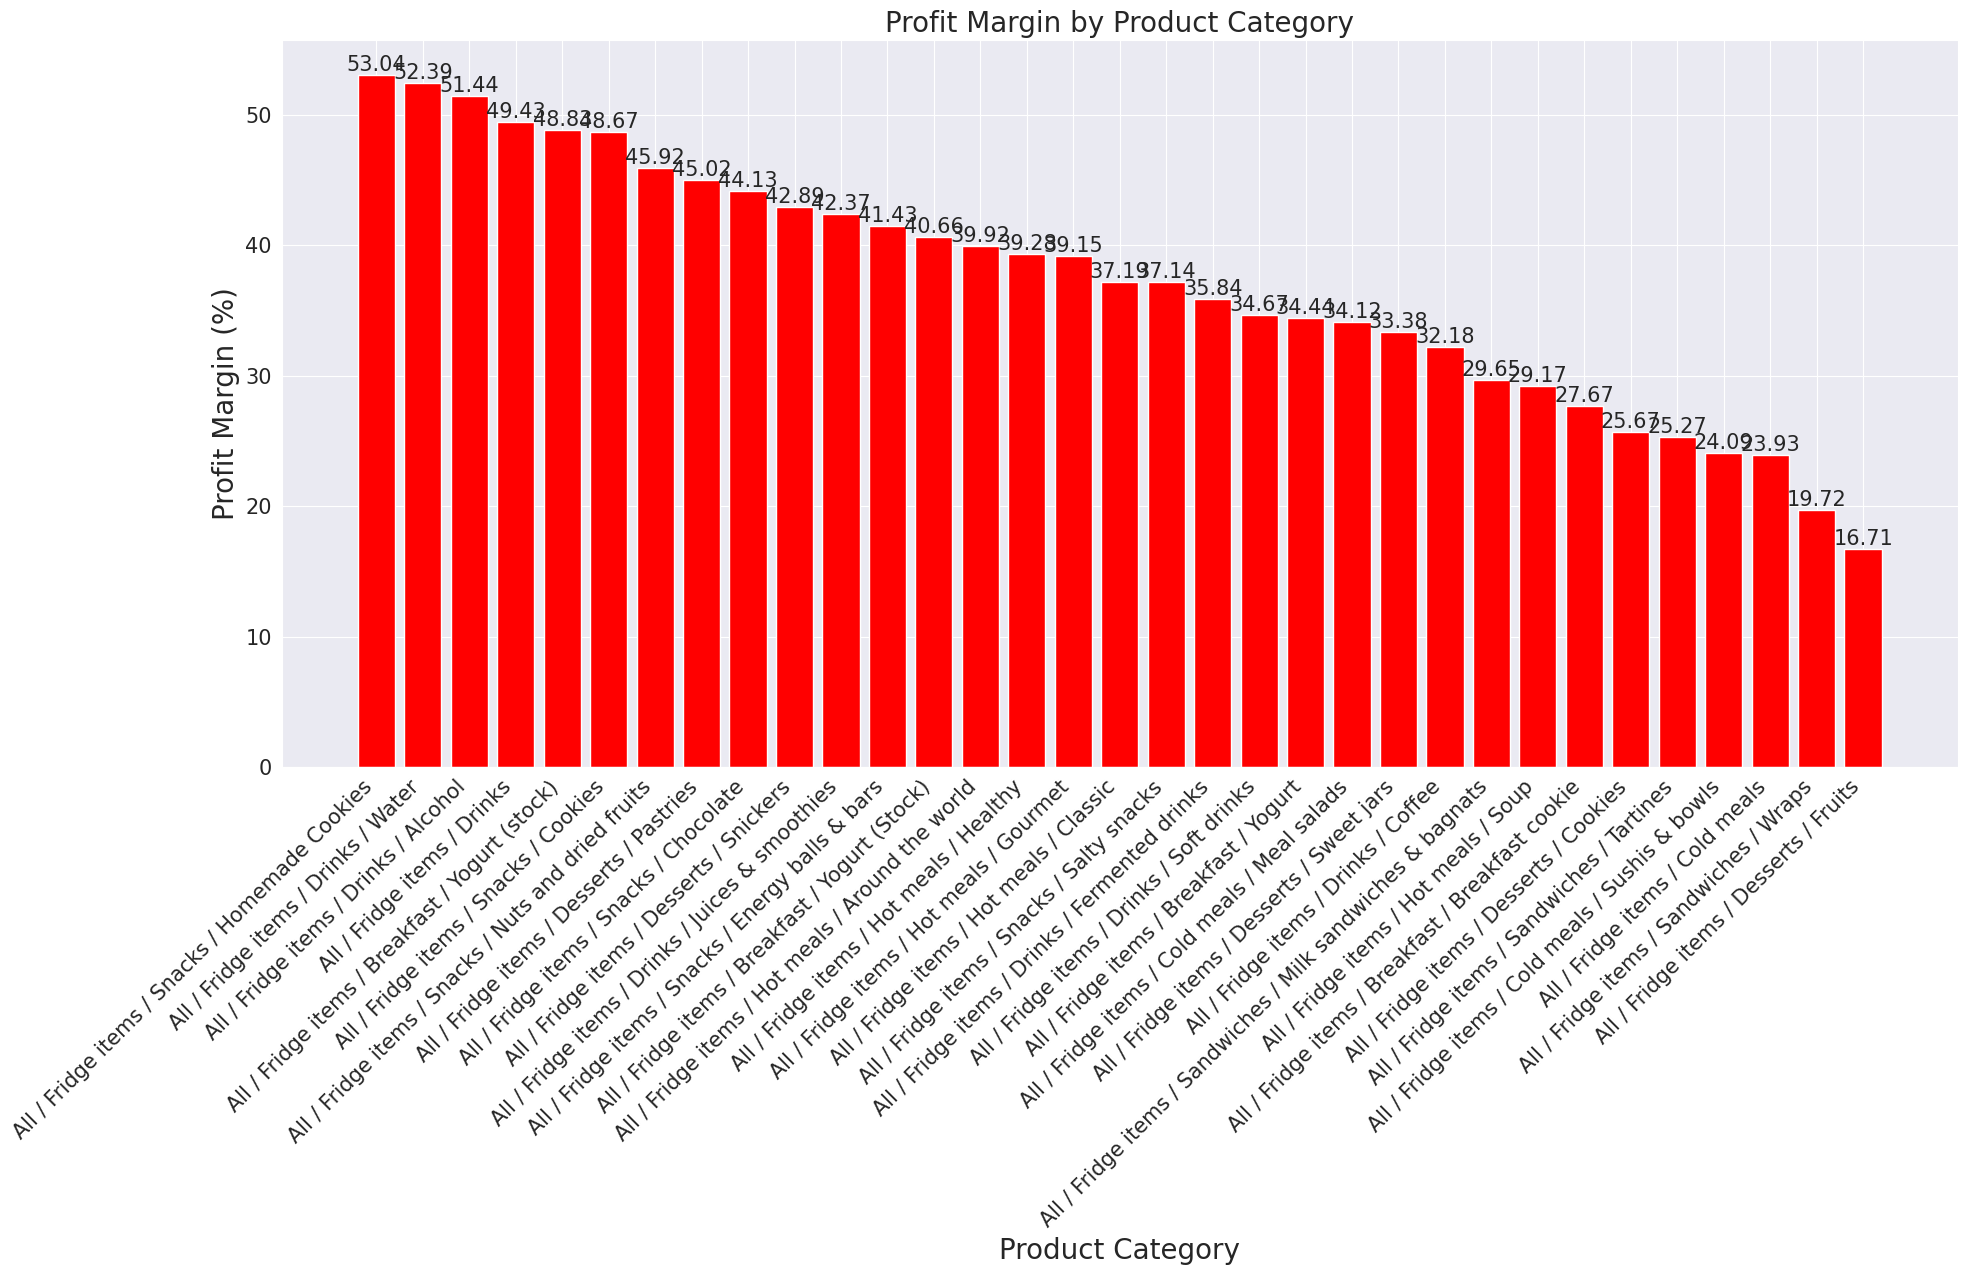

In [ ]:
plt.figure(figsize=(20, 13))
category_profits_filtered = category_profits_sorted[category_profits_sorted['Product Category'] != 'Other']
bars = plt.bar(category_profits_filtered['Product Category'], category_profits_filtered['Profit Margin (%)'], color='red')


# Add the profit margin percentages above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set the title and labels
plt.title('Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit Margin (%)')

# Rotate the x-axis labels for better readability if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to ensure everything fits without overlap
plt.show()

**Assessing if high-selling products are also high-margin products**

                                     Product Category    Profit   Subtotal  \
5       All / Fridge items / Cold meals / Meal salads  63430.27  185927.86   
20           All / Fridge items / Hot meals / Classic  20820.13   55980.12   
26            All / Fridge items / Sandwiches / Wraps  10658.36   54045.61   
24  All / Fridge items / Sandwiches / Milk sandwic...  15154.68   51110.66   
7             All / Fridge items / Desserts / Cookies  10108.74   39375.45   
25         All / Fridge items / Sandwiches / Tartines   6259.66   24773.11   
27            All / Fridge items / Snacks / Chocolate   6540.97   14820.56   
6    All / Fridge items / Cold meals / Sushis & bowls   3478.04   14438.54   
9            All / Fridge items / Desserts / Pastries   6000.05   13326.82   
17          All / Fridge items / Drinks / Soft drinks   4520.23   13036.98   
1             All / Fridge items / Breakfast / Yogurt   4262.56   12376.90   
23              All / Fridge items / Hot meals / Soup   3487.40 

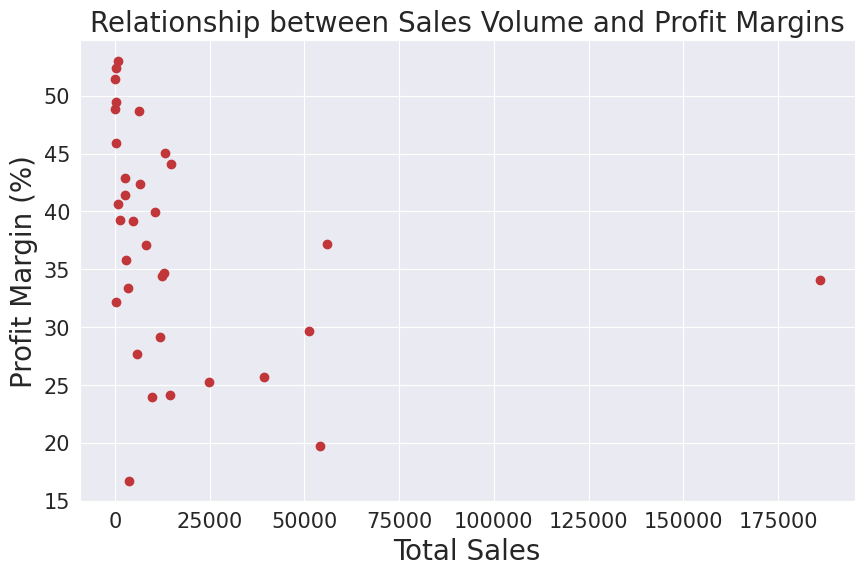

In [ ]:
category_profits = data.groupby('Product Category').agg({'Profit': 'sum','Subtotal': 'sum'}).reset_index()

# Calculate the profit margin percentage for each category
category_profits['Profit Margin (%)'] = (category_profits['Profit'] / category_profits['Subtotal']) * 100

# Sort the DataFrame by total sales to see which categories sell the most
category_profits.sort_values(by='Subtotal', ascending=False, inplace=True)

# Display the DataFrame
print(category_profits)

# Optionally, to assess the relationship between sales volume and profit margins, you can create a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(category_profits['Subtotal'], category_profits['Profit Margin (%)'])
plt.title('Relationship between Sales Volume and Profit Margins')
plt.xlabel('Total Sales')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.show()

                                     Product Category    Profit   Subtotal  \
5       All / Fridge items / Cold meals / Meal salads  63430.27  185927.86   
20           All / Fridge items / Hot meals / Classic  20820.13   55980.12   
26            All / Fridge items / Sandwiches / Wraps  10658.36   54045.61   
24  All / Fridge items / Sandwiches / Milk sandwic...  15154.68   51110.66   
7             All / Fridge items / Desserts / Cookies  10108.74   39375.45   
25         All / Fridge items / Sandwiches / Tartines   6259.66   24773.11   
27            All / Fridge items / Snacks / Chocolate   6540.97   14820.56   
6    All / Fridge items / Cold meals / Sushis & bowls   3478.04   14438.54   
9            All / Fridge items / Desserts / Pastries   6000.05   13326.82   
17          All / Fridge items / Drinks / Soft drinks   4520.23   13036.98   
1             All / Fridge items / Breakfast / Yogurt   4262.56   12376.90   
23              All / Fridge items / Hot meals / Soup   3487.40 

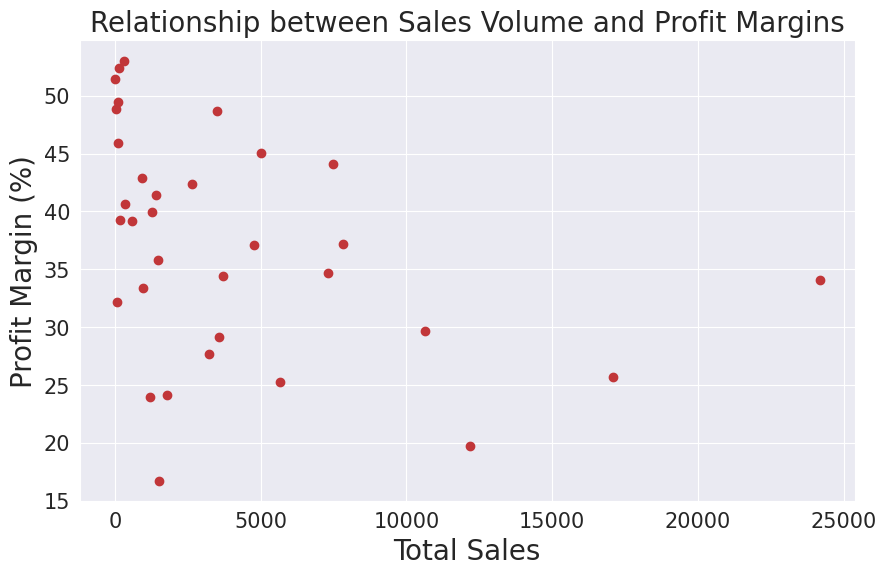

In [ ]:
category_profits = data.groupby('Product Category').agg({'Profit': 'sum','Subtotal': 'sum', 'Quantity': 'sum'}).reset_index()

# Calculate the profit margin percentage for each category
category_profits['Profit Margin (%)'] = (category_profits['Profit'] / category_profits['Subtotal']) * 100

# Sort the DataFrame by total sales to see which categories sell the most
category_profits.sort_values(by='Subtotal', ascending=False, inplace=True)

# Display the DataFrame
print(category_profits)

# Optionally, to assess the relationship between sales volume and profit margins, you can create a scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(category_profits['Quantity'], category_profits['Profit Margin (%)'])
plt.title('Relationship between Sales Volume and Profit Margins')
plt.xlabel('Total Sales')
plt.ylabel('Profit Margin (%)')
plt.grid(True)
plt.show()

#**4.Operational Efficiency** :

# **Top fridges**

##Top fridges by sales

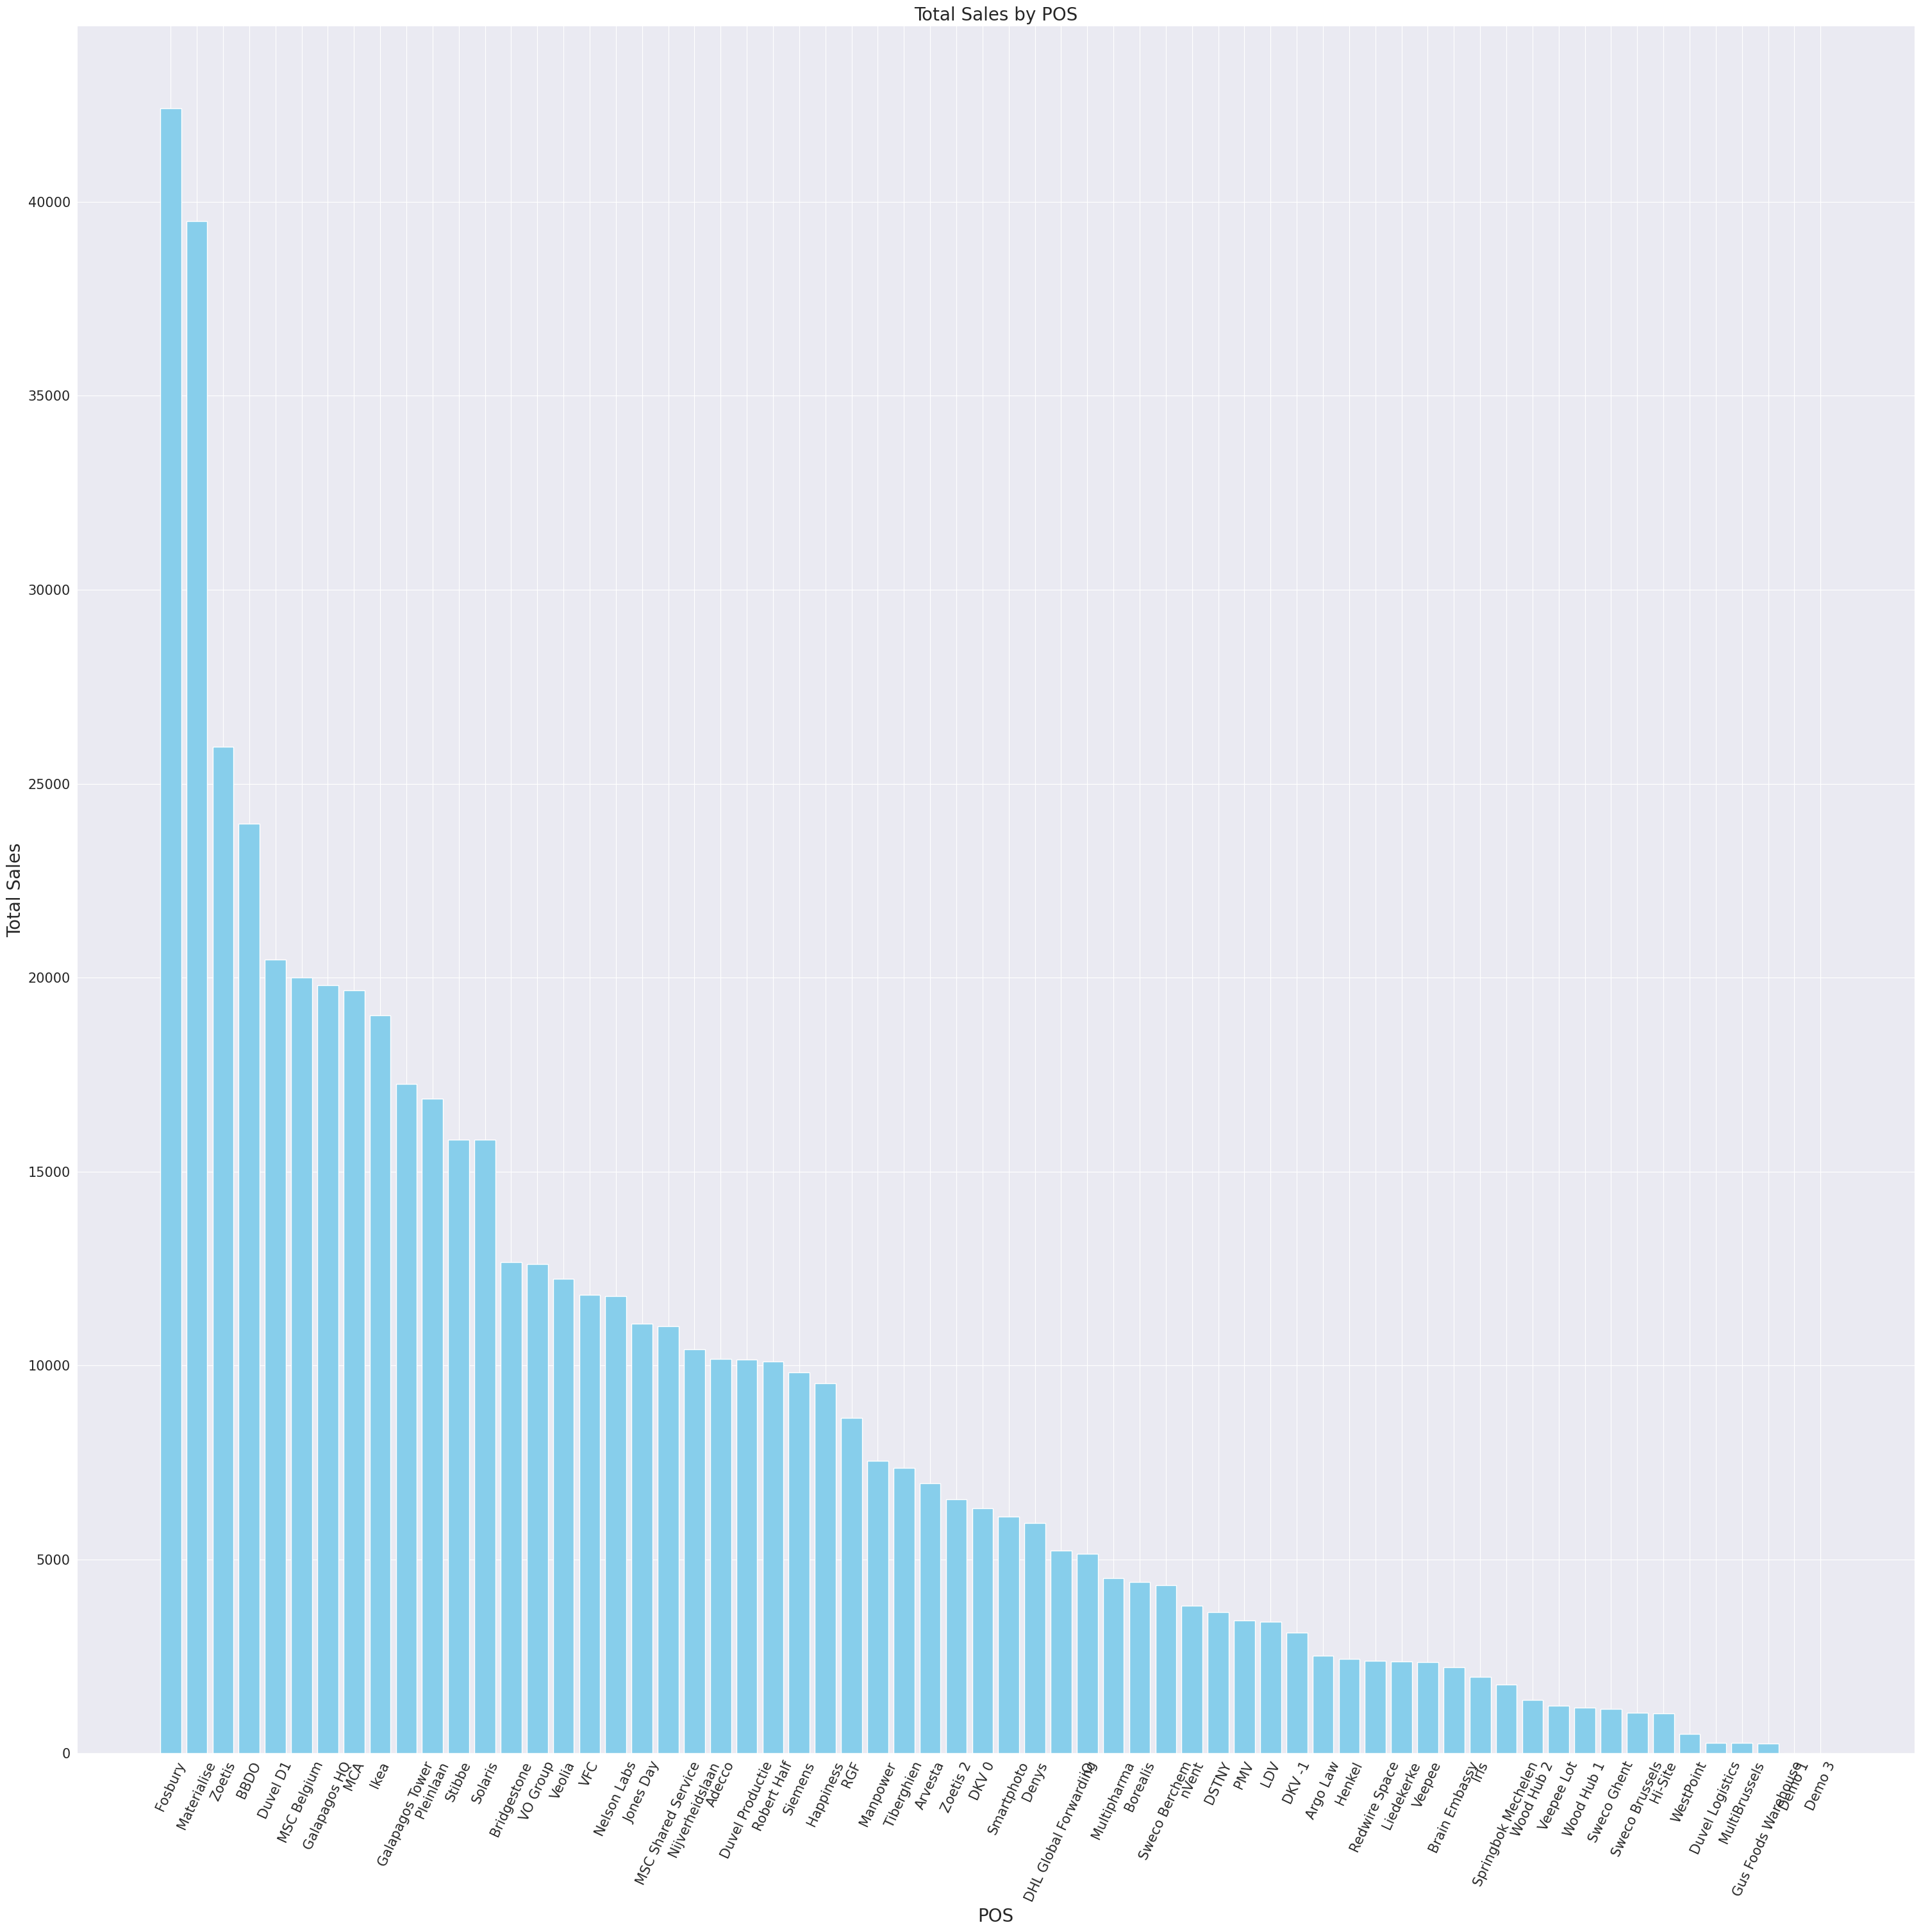

In [ ]:
#Aggregate Sales by POS
sales_by_pos = data.groupby('POS')['Subtotal'].sum().reset_index()
# Sorting the sales from highest to lowest for better visualization
sales_by_pos = sales_by_pos.sort_values('Subtotal', ascending=False)

# Creating a bar chart
plt.figure(figsize=(37, 35))
plt.bar(sales_by_pos['POS'], sales_by_pos['Subtotal'], color='skyblue')
plt.xlabel('POS')
plt.ylabel('Total Sales')
plt.title('Total Sales by POS')
plt.xticks(rotation=65)  # Rotate POS labels for better readability
plt.show()

## Top fridges by number of orders

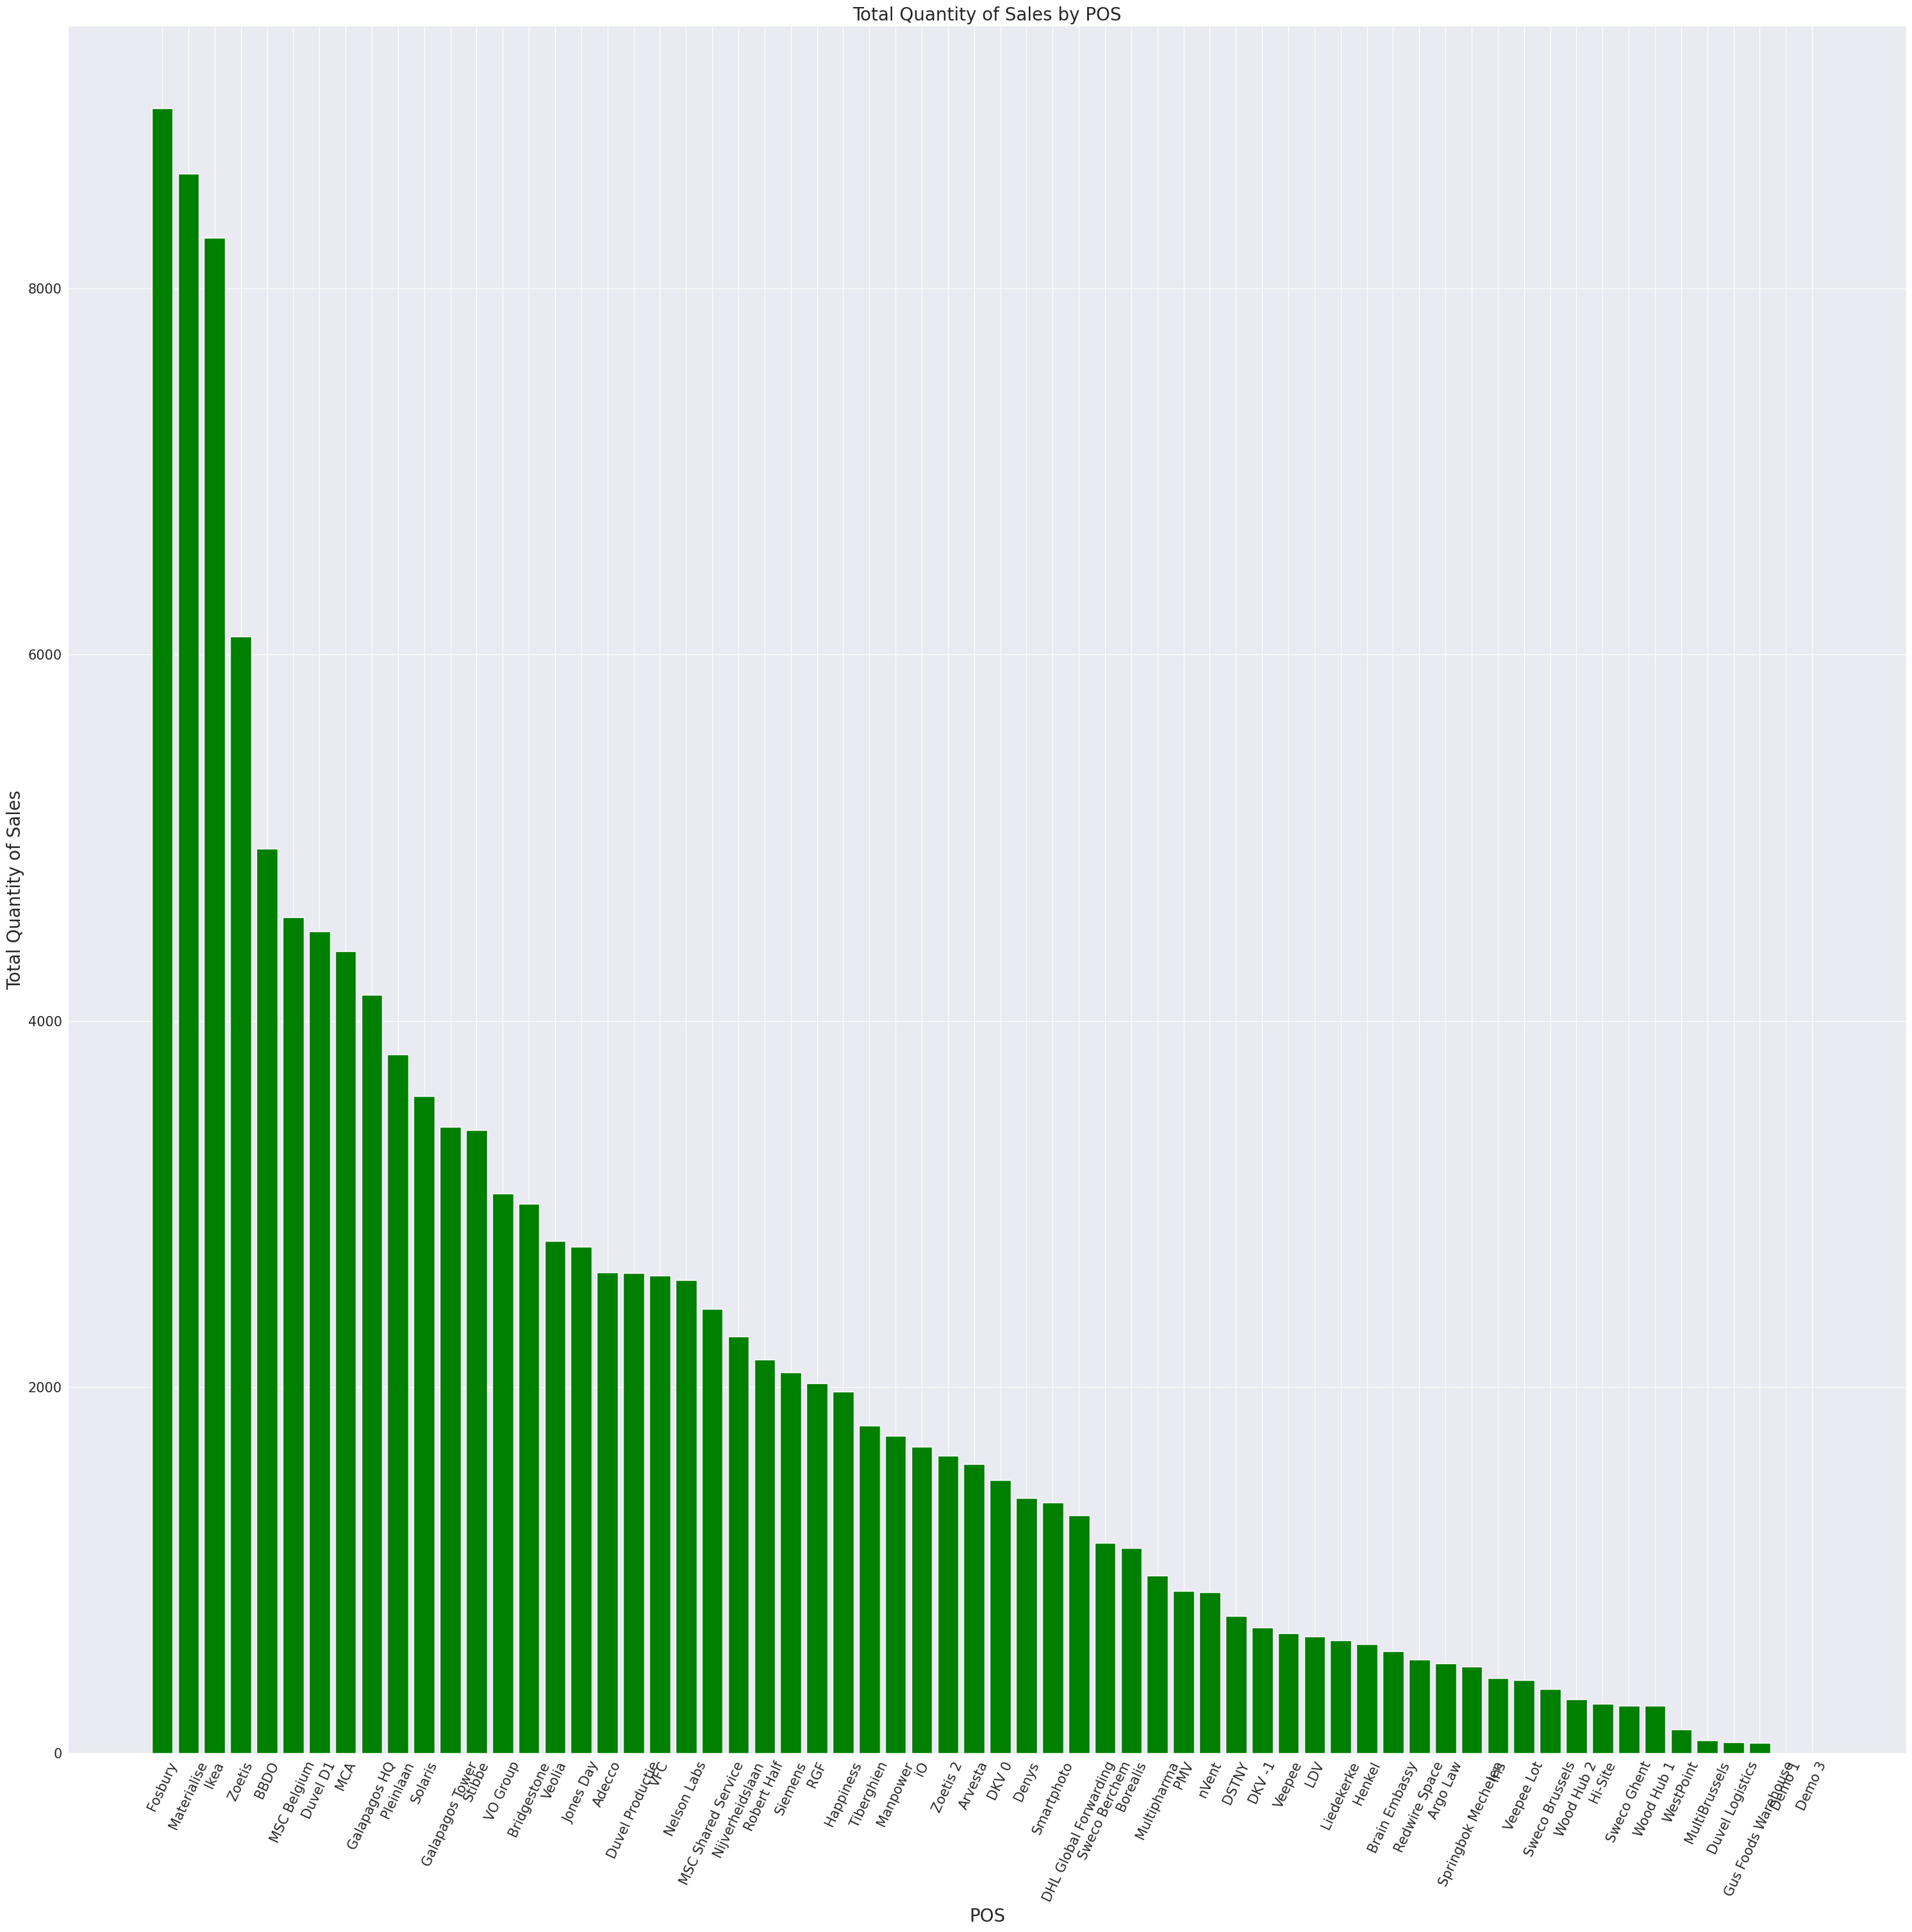

In [ ]:
sales_by_pos = data.groupby('POS')['Quantity'].sum().reset_index()
# Sorting the sales from highest to lowest for better visualization
sales_by_pos = sales_by_pos.sort_values('Quantity', ascending=False)

# Creating a bar chart
plt.figure(figsize=(37, 35))
plt.bar(sales_by_pos['POS'], sales_by_pos['Quantity'], color='green')
plt.xlabel('POS')
plt.ylabel('Total Quantity of Sales')
plt.title('Total Quantity of Sales by POS')
plt.xticks(rotation=65)  # Rotate POS labels for better readability
plt.show()